ANJU GOPINATH

==============================================================================================================

$********************************$
# A2.2 Multilayered Neural Network
$********************************$

* 2.2: *Added example output in Section 1.1.*
* 2.1: *Added A2grader.tar and details on how to rename the functions for the use of the asymmetric sigmoid activation function.*

You will implement a set of functions for training and testing a multilayered neural network to predict continuous-valued target values.  This assignment provides an implementation of the functions for a neural network with one hidden layer.  You must modify the functions to allow any number of hidden layers, each with any number of units.

FUNCTION DESCRIPTION:

* `add_ones(X)`: Given an $N \times D$ matrix of inputs, prepend column of 1's and return the resulting $N \times D+1$ matrix.
* `make_weights(n_inputs, n_hiddens, n_outputs):` Given integers `n_inputs`, `n_hiddens` and `n_outputs`, create weight matrices `V` for the hidden layer and `W` for the output layer.
* `forward(Xst, V, W)`: Given standardized input matrix `Xst` and weight matrices `V` and `W`, calculate the output of all layers and return the outputs of the hidden layer, `Z` as an $N \times H$ matrix, where $H$ is the number of hidden units, and the outputs of the output layer `Y` as an $N \times K$ matrix, where $K$ is the number of output values for each sample. 
* `backward(Xst, Tst, V, W)`: Given standardized input matrix `Xst`, standardized target matrix `Tst`, and weight matrices `V` and `W`,, calculate the gradient of the mean squared error with respect to the weights `V` and `W`, returning a tuple of both gradients, with respect to `V` as the first element and with respect to `W` as the second element.
* `train_sgd(X, T, V, W, learning_rate, n_epochs):` Given input and target matrices `X` and `T`, weight matrices `V` and `W`, a learning_rate and the number of epochs to train, update the weights for `n_epochs` iterations using the gradient of the mean squared over the whole data set in `X` and `T`  and return the resulting new weight matrices `V` and `W`, the standardization parameters, and the list of RMSE training errors, one per epoch.
* `use(X, V, W, stand_parms):` Calculate outputs of both layers after standardizing input `X`. Return outputs of hidden layer, and unstandardized output of output layer.
* `rmse(Y, T):` Return the RMSE between `Y` and `T`, both of which are not standardized.
* `calc_standardize_parameters(X, T)`: calculate and return as a dictionary the column means and standard deviations of `X` and `T`.
* `standardize_X(X, stand_parms)`: return standardized `X`.
* `standardize_T(T, stand_parms)`: return standardized `T`.
* `unstandardize_X(Xst, stand_parms)`: return unstandardized `X` (probably not needed).
* `unstandardize_T(Tst, stand_parms)`: return unstandardized `T`, will be needed by `use`.

==============================================================================================================

$********************************$
##                               PART 1 OF ASSIGNMENT : DESCRIPTION
$********************************$

### PART 1.1 - MODIFY THE GIVEN CODE TO IMPLEMENT A MULTILAYERED NEURAL NETWORK

The changes you must implement are specified here.  We recommend that you copy the above code cells and paste them below, then edit them appropriately.

You will implement a set of functions for training and testing a multilayered neural network to predict continuous-valued target values.  This assignment provides an implementation of the functions for a neural network with one hidden layer.  You must modify the functions to allow any number of hidden layers, each with any number of units.

The required functions are:

* `make_weights(n_inputs, n_hiddens_list, n_outputs):` Given integers `n_inputs`, list of `n_hiddens`, one integer per hidden layer, and `n_outputs`, create and return list of weight matrices, one for each layer.
* `forward(Xst, Ws)`: Given standardized input matrix `X` and list of weight matrices `Ws`, calculate the output of all layers and return a list of the outputs of each layer.
* `backward(Xst, Tst, Ws)`: Given standardized input matrix `X`, standardized target matrix `T`, and list of weight matrices `Ws`, calculate the gradient of the mean squared error with respect to the weights in each layer, returning a tuple or list of all gradient matrices.
* `train_sgd(X, T, Ws, learning_rate, n_epochs):` Given input and target matrices `X` and `T`, liist of all weight matrices `Ws`, a learning_rate and the number of epochs to train, update the weights for `n_epochs` iterations using the gradient of the mean squared over the whole data set in `X` and `T`  and return the list of resulting new weight matrices, the standardization parameters, and the list of RMSE training errors, one per epoch.
* `use(X, Ws, stand_parms):` Calculate outputs of all layers after standardizing input `X`. Return list of outputs of each hidden layer, and unstandardized output of output layer.

### PART 1.2 - TEST CODE WITH 2 HIDDEN LAYERS , PLOT THE RESULTS

Test your functions on the same one-dimensional data defined above as `Xtrain, Ttrain` and `Xtest, Ttest` shown above.  Try your code using two hidden layers of as many units in each layer as you wish.  Plot the results, including an additional plot to show the outputs of each of the two hidden layers.

### PART 1.3 - TEST CODE WITH 1, 2, 3 AND 4 HIDDEN LAYERS USING A FOR LOOP

Write a for loop to create and train neural nets containing one, two, three and four hidden layers each with 4 hidden units. Train each for 10,000 epochs and a learning rate of 0.1. Collect list of results with each result being a list containing the number of layers and the RMSE for training and testing data.

### PART 1.4 - DISPLAY A TABLE WITH RESULTS OF PART 1.3

Print a pretty table of your results be creating a `pandas` DataFrame of the results list (of lists). Discuss the results.

### PART 1.5 - DISCUSSION OF RESULTS OF FOR LOOP

<b>As mentioned in the grader</b>:
Good discussion of the results from the for loop.  Use at least four sentences. 

==============================================================================================================

$********************************$
## PART 2 OF ASSIGNMENT : ASIG
$********************************$

### PART 2.1 - Description


Copy and paste here the following functions and rename them as shown.  These new versions will use the asymmetric sigmoid activation function instead of the symmetric one that used `tanh`.  Repeat the above experiments with the one-dimensional data.

* `forward` becomes `forward_asig`
* `backward` becomes `backward_asig`
* `train_sgd` becomes `train_sgd_asig`
* `use` becomes `use_asig`

### PART 2.2 - DISCUSSION OF RESULTS OF FOR LOOP, COMPARISON WITH TANH RESULTS

<b>As mentioned in the grader</b>:
Good discussion of results you get with the above loop using the asymmetric sigmoid activation function. Use at least six sentences. In your discussion, compare differences and similarities between the results for tanh and asymmetric sigmoid.

==============================================================================================================

$********************************$
## EXTRA CREDIT
$********************************$

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.

==============================================================================================================

$**********************************************$
## GIVEN 1-D INPUT DATA AND IT'S PLOT
$**********************************************$

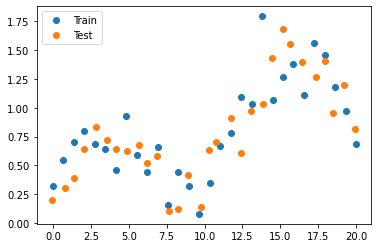

In [133]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 30

Xtrain = np.linspace(0., 20.0, n_samples).reshape((n_samples, 1))
Ttrain = 0.2 + 0.05 * (Xtrain) + 0.4 * np.sin(Xtrain / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n_samples, 1))
Ttest = 0.2 + 0.05 * (Xtest) + 0.4 * np.sin(Xtest / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

plt.plot(Xtrain, Ttrain, 'o', label='Train')
plt.plot(Xtest, Ttest, 'o', label='Test')
plt.legend();

==============================================================================================================

$********************************$
# SOLUTION
$********************************$

##  PART 1 

### PART 1.1 - IMPLEMENTATION OF MULTILAYERED NEURAL NETWORK


In [134]:
def add_ones(X):
    return np.insert(X, 0, 1, axis=1)

def make_weights(n_inputs, n_hiddens, n_outputs):
    # Create and return weight matrices, Ws, for the hidden and output layers.
    # Initialize them to uniformly-distribted random values between -sqrt(n_in) and +sqrt(n_in)
    
    # Initialize hidden units from left to right
    Ws=[]
    input_i=n_inputs
    for i in range(len(n_hiddens)):
        V = np.random.uniform(-1, 1, size=(1 + input_i, n_hiddens[i])) / np.sqrt(input_i + 1)
        input_i = n_hiddens[i]
        Ws.append(V)
    
    #Initialize the output layer
    W = np.random.uniform(-1, 1, size=(1 + n_hiddens[-1], n_outputs)) / np.sqrt(n_hiddens[-1] + 1)
    Ws.append(W)
   
    return Ws

def forward(Xst, Ws):
    
    Z=[]
    # Calculate the outputs, Z, of all hidden units, given all input samples in X.
   
    input_i=Xst
    for i in range(len(Ws)-1):
        output_i=np.tanh(add_ones(input_i) @ Ws[i])
        Z.append(output_i)
        input_i=output_i
    
    # Calculate the outputs, Y, of all output units, given all outputs of the hidden units.
    Yst = add_ones(Z[-1]) @ Ws[-1]
    ZYst=[]
    for i in range(len(Z)):
        ZYst.append(np.array(Z[i]))
    ZYst.append(Yst)
    return ZYst

def backward(Xst, Tst, Ws):
    n_samples = Xst.shape[0]
    n_outputs = Tst.shape[1]
    # Calculate the outputs of both layers.
    ZYst = forward(Xst, Ws)
    
    Yst=ZYst[-1]
    del ZYst[-1]
    Z=ZYst
    # Calculate the delta value for the output layer. Divide by n_samples * n_outputs
    # because we are calculating the gradient of the mean sqauared error with respect to weights.
    

    delta = -(Tst - Yst) /  (n_samples * n_outputs)
    # The gradient of the mean squared error with respect to the output layer weights W.
    gradient_W = add_ones(Z[-1]).T @ delta
    # Back-propagate the delta value from the output layer, through the output layer weights,
    # to the hidden units.  Multiply the result by the derivative of the hidden units'
    # activation function, tanh    
    gradient_Vs=[]
    XZ=[]
    XZ.append(Xst)
    for i in range(len(Z)):
        XZ.append(Z[i])
    
    Ws_temp=Ws[:]
    
    
    for i, j in zip(range(len(Ws)-2,-1,-1),range(len(XZ)-1,0,-1)):
       
        W_curr=Ws_temp[i+1]
        delta=(delta @ W_curr[1:, :].T)*(1 - XZ[j] ** 2)
      
        G= add_ones(XZ[j-1]).T @ delta
        gradient_Vs.insert(0,G)
    # Return both gradients.  Each should be the same shape as the respective weight matrices.
    gradient_Vs.append(gradient_W)
    return gradient_Vs


def train_sgd(X, T, Ws, learning_rate, n_epochs):
      # Store standardization parameters in dictionary stand_parms.
   
    stand_parms = calc_standardize_parameters(X, T)
    # Standardize X and T.
    Xst = standardize_X(X, stand_parms)
    Tst = standardize_T(T, stand_parms)

    error_trace = []
   
    # Update weights for n_epochs passes through the training data
    for epoch in range(n_epochs):

        # Calculate the gradients of the mean squared error with respect to each weight matrix.
        gradient_Ws = backward(Xst, Tst, Ws)

        # Update the values in each weight matrix using SGD.
        

        for i in range(len(Ws)):
         Ws[i]-=learning_rate*gradient_Ws[i]
        #V -= learning_rate * gradient_V
        #W -= learning_rate * gradient_W

        # Calculate the outputs of both layers given the current weight values.
        ZYst = forward(Xst, Ws)
        Yst=ZYst[-1]
       
        Y = unstandardize_T(Yst, stand_parms)
        error_trace.append(rmse(Y, T))
    return Ws, stand_parms, error_trace

def use(X, Ws, stand_parms):
    # Standardize inputs X
    Xst = standardize_X(X, stand_parms)
    # Calculate outputs of each layer.
    
    ZYst = forward(Xst, Ws)
    
    Yst=ZYst[-1]#output layer only
    del ZYst[-1]
    Z=ZYst#hidden layers only
    
    # Unstandardize output of output layer
    Output=[]
    for i in range(len(Z)):
        Output.append(np.array(Z[i]))
    Output.append(np.array(unstandardize_T(Yst, stand_parms)))
    return Output
    #return Z,unstandardize_T(Yst, stand_parms)

def rmse(Y, T):
    error = T - Y
    return np.sqrt(np.mean(error ** 2))

def calc_standardize_parameters(X, T):
    Xmeans = X.mean(axis=0)
    Xstds = X.std(axis=0)
    Tmeans = T.mean(axis=0)
    Tstds = T.std(axis=0)
    return {'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

def standardize_X(X, stand_parms):
    return (X - stand_parms['Xmeans']) / stand_parms['Xstds']


def unstandardize_X(Xst, stand_parms):
    return Xst * stand_parms['Xstds'] + stand_parms['Xmeans']


def standardize_T(T, stand_parms):
    return (T - stand_parms['Tmeans']) / stand_parms['Tstds']


def unstandardize_T(Tst, stand_parms):
    return Tst * stand_parms['Tstds'] + stand_parms['Tmeans']

### PART 1.2 - TEST CODE WITH 2 HIDDEN LAYERS , PLOT THE RESULTS

In [135]:
def plot(error_trace,Xtrain,Ttrain,Xtest,Ttest,Ws,stand_parms,l1_units,l2_units,i,learning_rate,loop_number):
    print('Plot No ',loop_number)
    print('Learning Rate : ',learning_rate,', 2 Hidden layers => Layer 1 : ',l1_units,' units, Layer 2 : ',l2_units,' units' )

    plt.figure(figsize=(10, 10))
    plt.subplot(4, 1, 1)
    plt.plot(error_trace)
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')

    plt.subplot(4, 1, 2)
    plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
    plt.plot(Xtest, Ttest, 'o', label='Testing Data')
    X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
    Output_train = use(X_for_plot, Ws, stand_parms)

    Y_train=Output_train[2]
    plt.plot(X_for_plot, Y_train, label='Neural Net Output')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')

    Z_train=Output_train[0]
    plt.subplot(4, 1, 3)
    plt.plot(X_for_plot, Z_train)
    plt.xlabel('X')
    plt.ylabel('1st Hidden Layer Outputs')

    Z_train=Output_train[1]
    plt.subplot(4, 1, 4)
    plt.plot(X_for_plot, Z_train)
    plt.xlabel('X')
    plt.ylabel('2nd Hidden Layer Outputs')
    plt.show()

#### HIDDEN LAYERS = 2 ; VARY HIDDEN UNITS IN EACH LAYER ; VARY LEARNING RATE

RMSE: Train 0.22 Test 0.25
Plot No  1
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  2  units, Layer 2 :  2  units


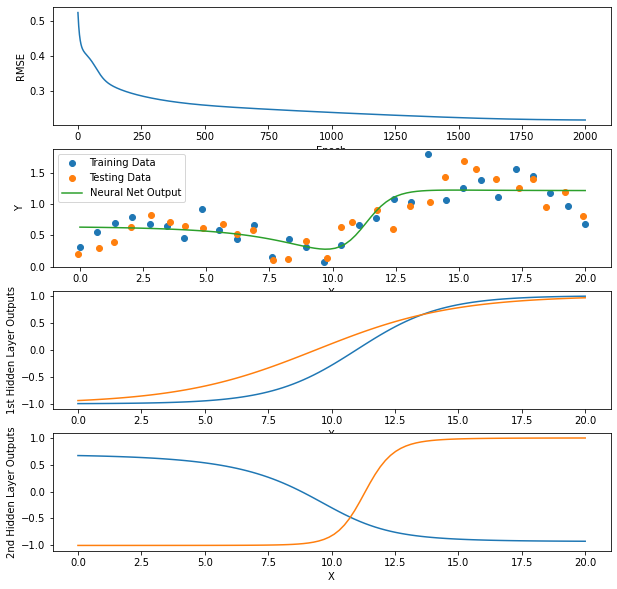

RMSE: Train 0.24 Test 0.25
Plot No  2
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  2  units, Layer 2 :  2  units


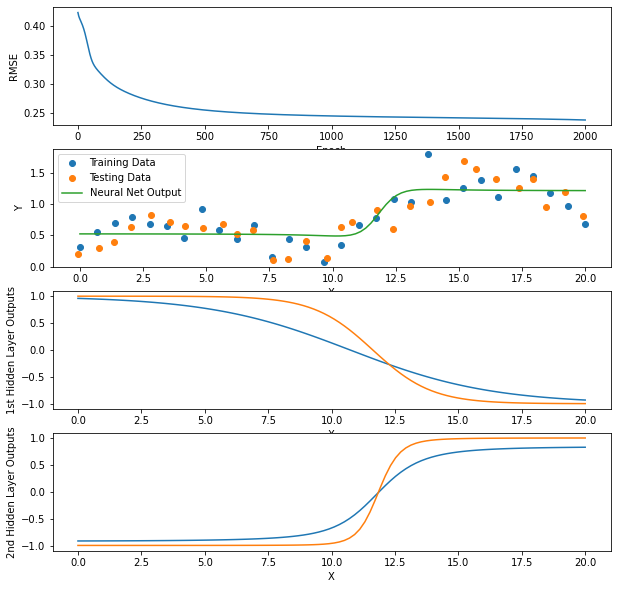

RMSE: Train 0.20 Test 0.22
Plot No  3
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  2  units, Layer 2 :  2  units


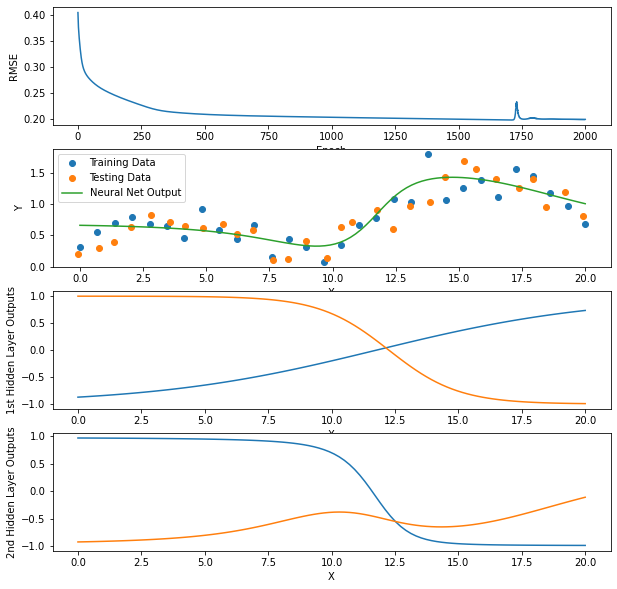

RMSE: Train 0.19 Test 0.22
Plot No  4
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  2  units, Layer 2 :  2  units


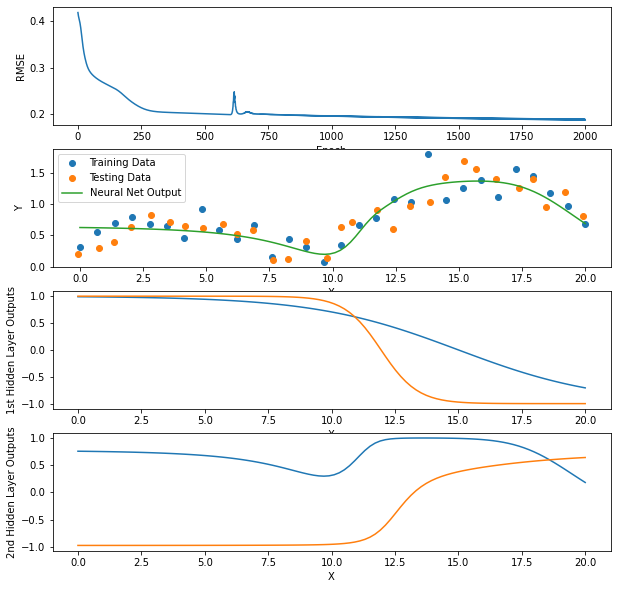

RMSE: Train 0.21 Test 0.23
Plot No  5
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  4  units, Layer 2 :  4  units


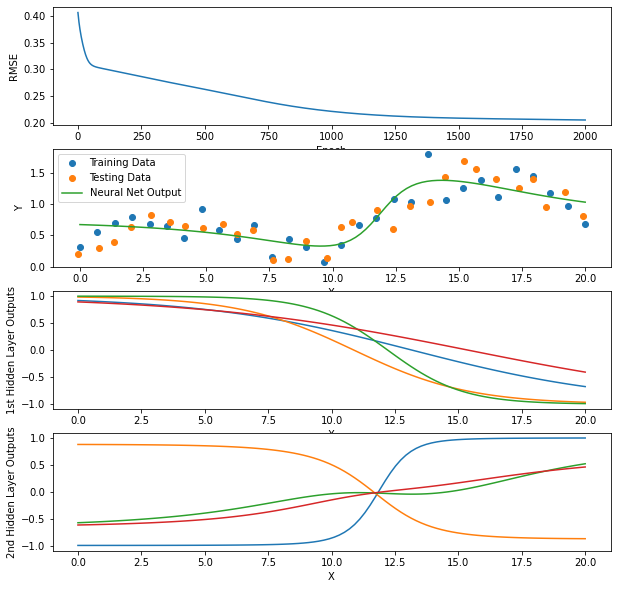

RMSE: Train 0.19 Test 0.22
Plot No  6
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  4  units, Layer 2 :  4  units


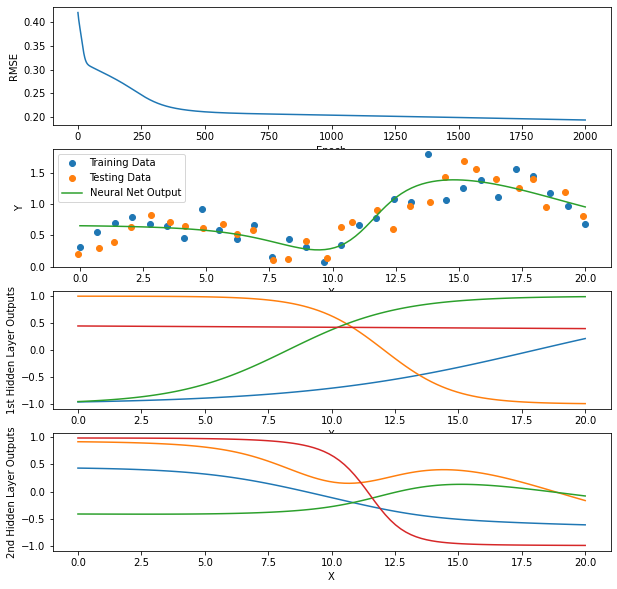

RMSE: Train 0.18 Test 0.21
Plot No  7
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  4  units, Layer 2 :  4  units


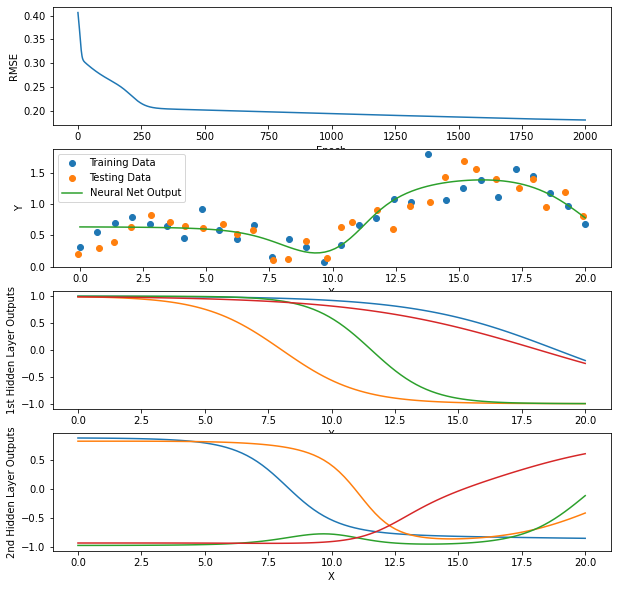

RMSE: Train 0.18 Test 0.21
Plot No  8
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  4  units, Layer 2 :  4  units


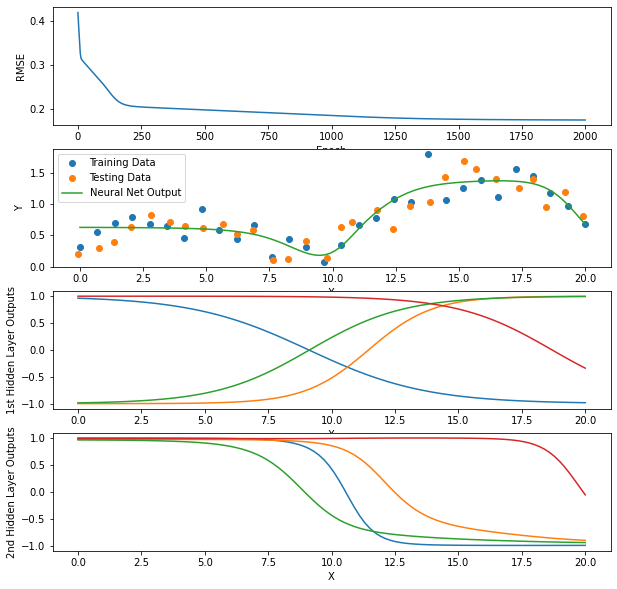

RMSE: Train 0.21 Test 0.24
Plot No  9
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  10  units, Layer 2 :  10  units


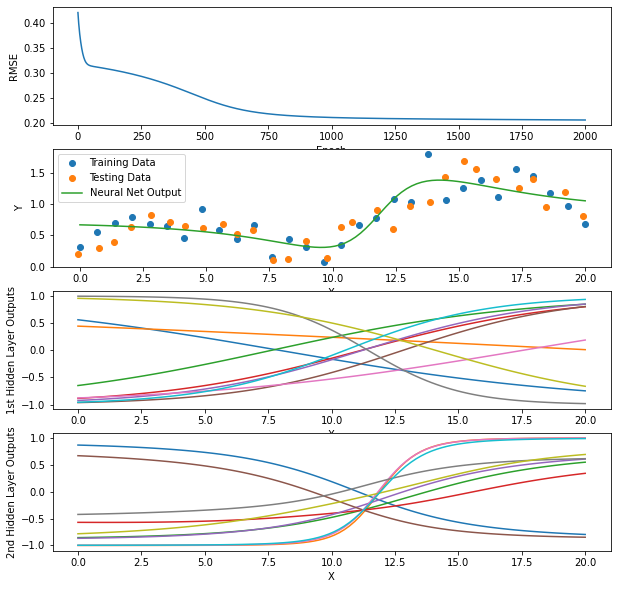

RMSE: Train 0.19 Test 0.21
Plot No  10
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  10  units, Layer 2 :  10  units


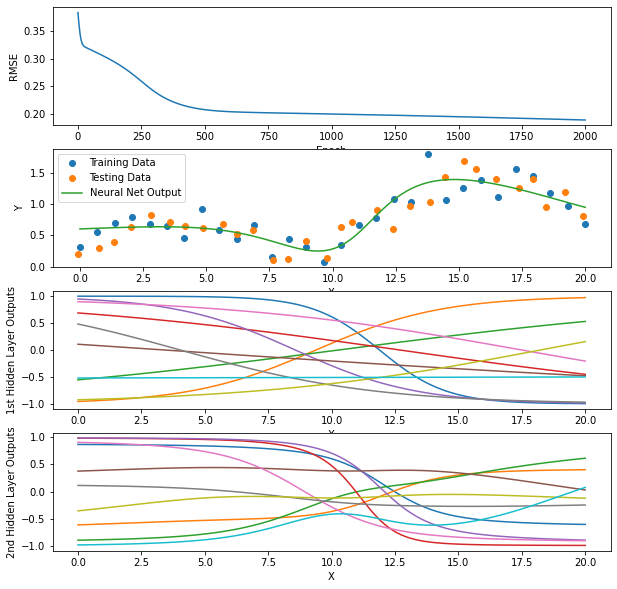

RMSE: Train 0.18 Test 0.20
Plot No  11
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  10  units, Layer 2 :  10  units


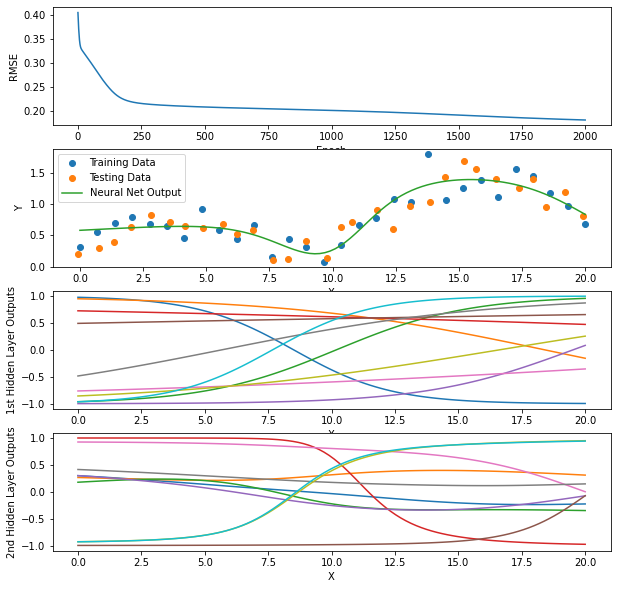

RMSE: Train 0.17 Test 0.21
Plot No  12
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  10  units, Layer 2 :  10  units


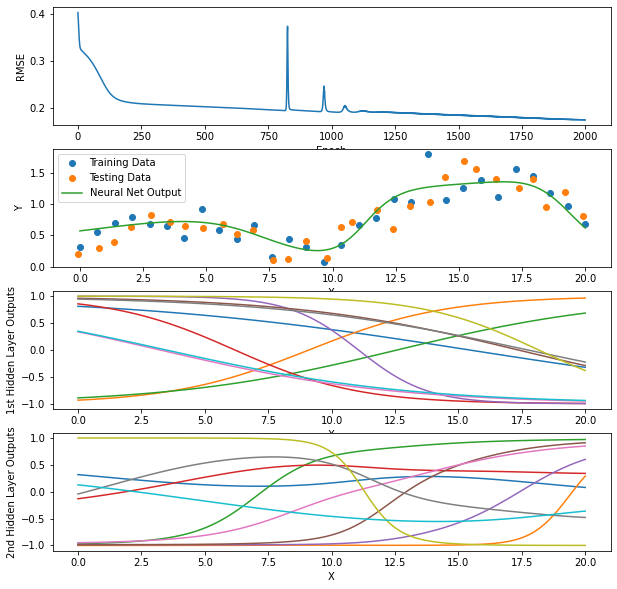

RMSE: Train 0.21 Test 0.24
Plot No  13
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  20  units, Layer 2 :  20  units


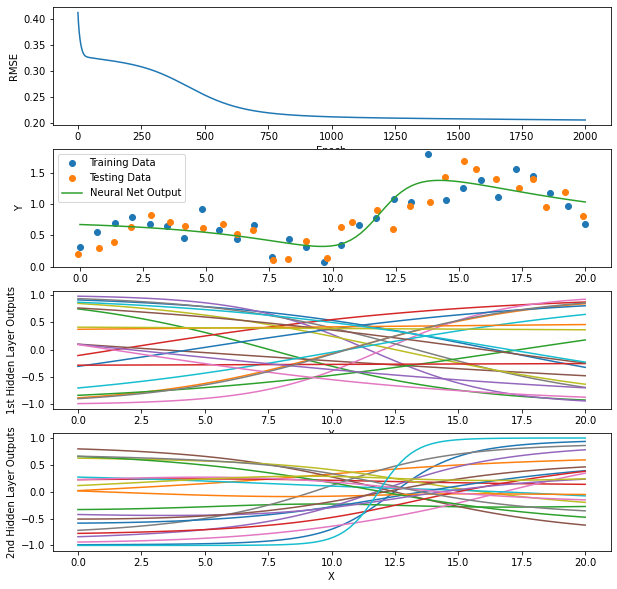

RMSE: Train 0.19 Test 0.22
Plot No  14
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  20  units, Layer 2 :  20  units


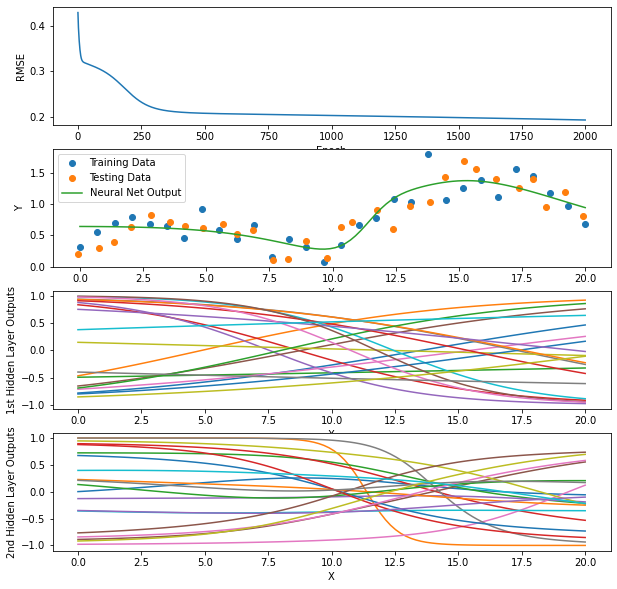

RMSE: Train 0.17 Test 0.22
Plot No  15
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  20  units, Layer 2 :  20  units


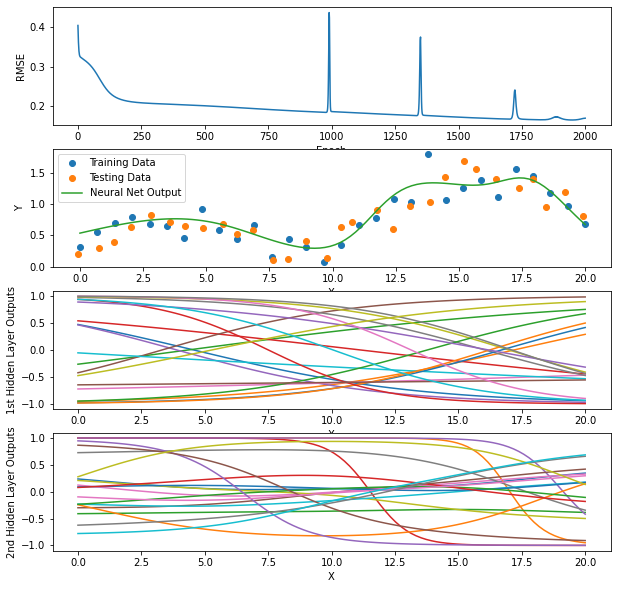

RMSE: Train 0.17 Test 0.21
Plot No  16
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  20  units, Layer 2 :  20  units


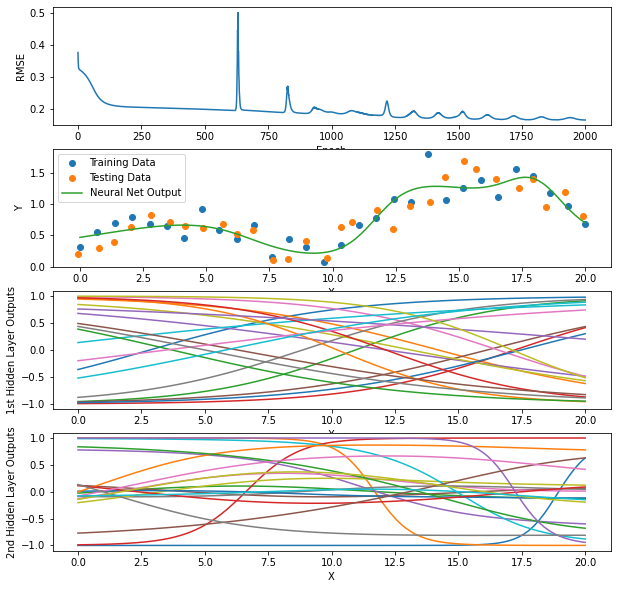

RMSE: Train 0.20 Test 0.22
Plot No  17
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  50  units, Layer 2 :  50  units


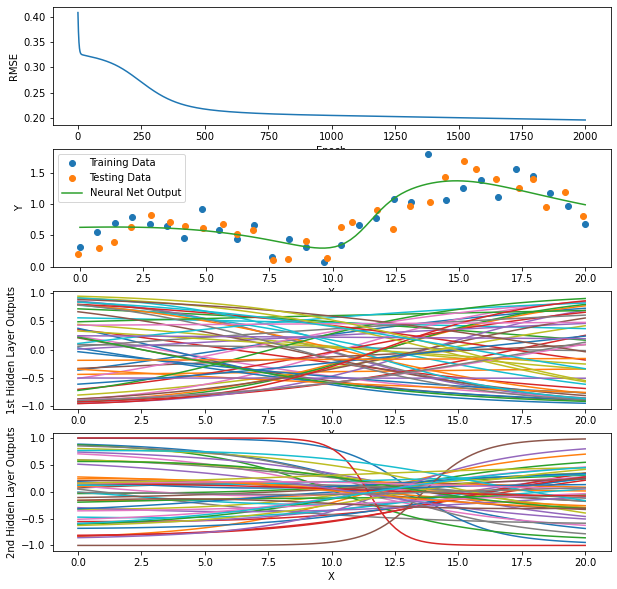

RMSE: Train 0.18 Test 0.20
Plot No  18
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  50  units, Layer 2 :  50  units


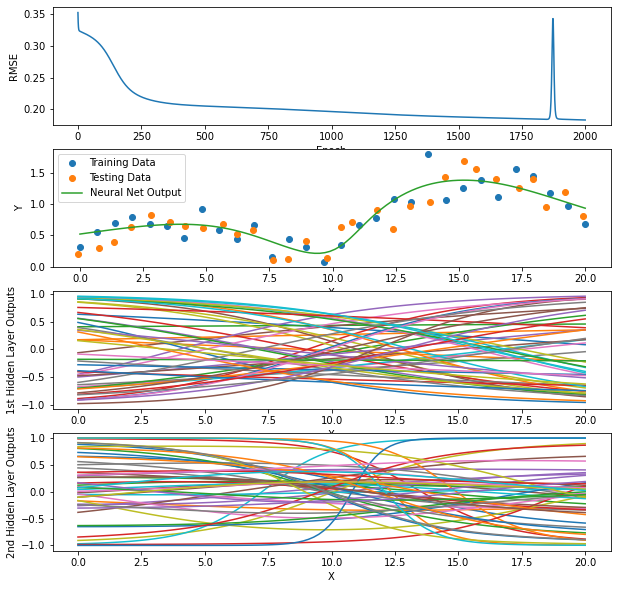

RMSE: Train 0.18 Test 0.21
Plot No  19
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  50  units, Layer 2 :  50  units


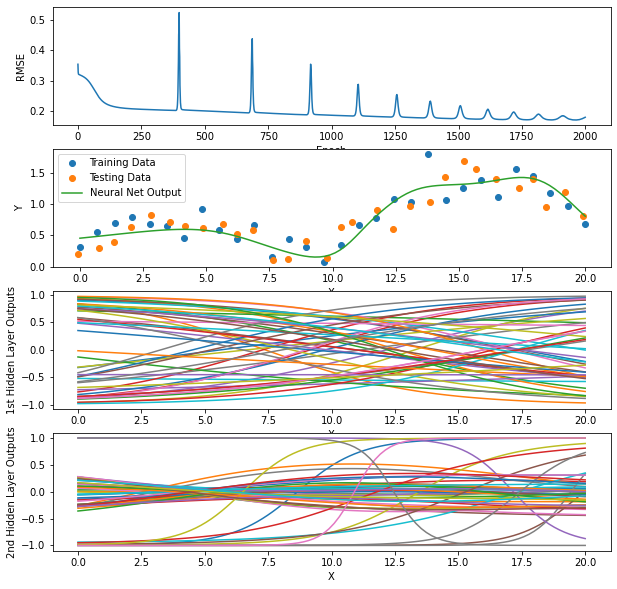

RMSE: Train 0.17 Test 0.21
Plot No  20
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  50  units, Layer 2 :  50  units


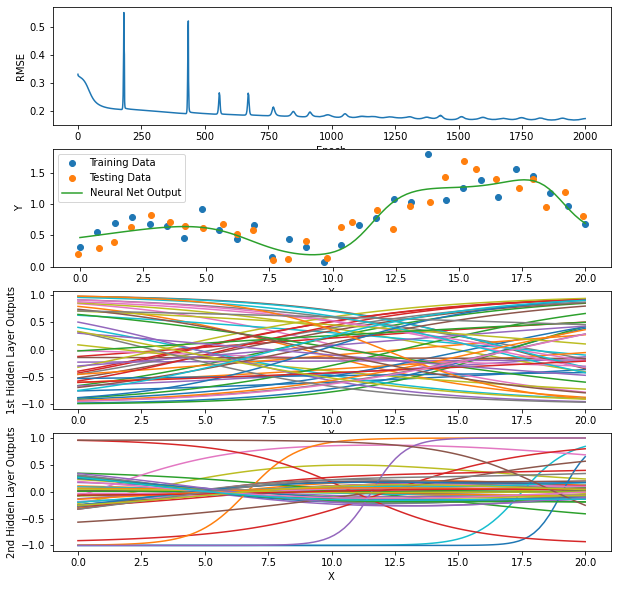

RMSE: Train 0.19 Test 0.21
Plot No  21
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  100  units, Layer 2 :  100  units


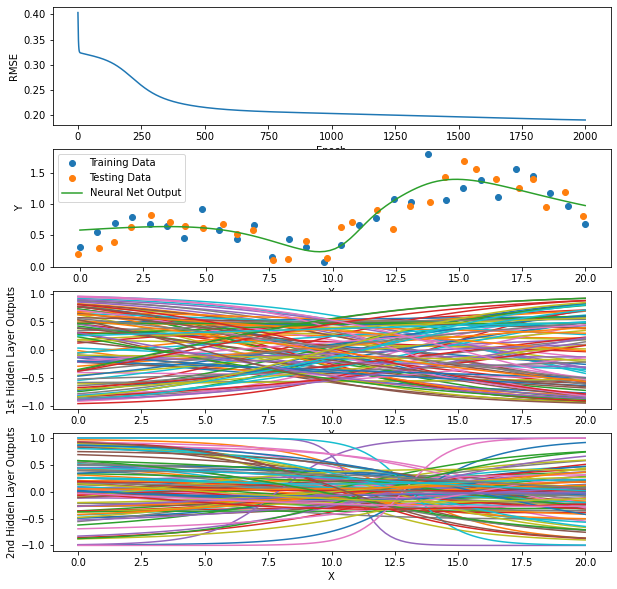

RMSE: Train 0.18 Test 0.20
Plot No  22
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  100  units, Layer 2 :  100  units


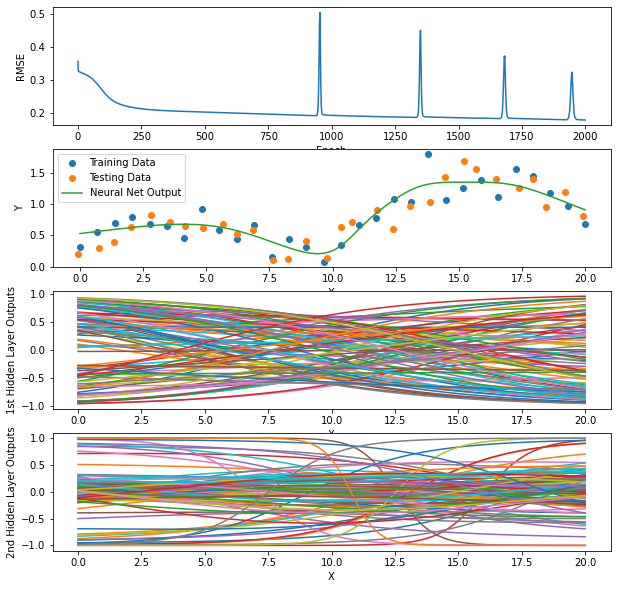

RMSE: Train 0.16 Test 0.21
Plot No  23
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  100  units, Layer 2 :  100  units


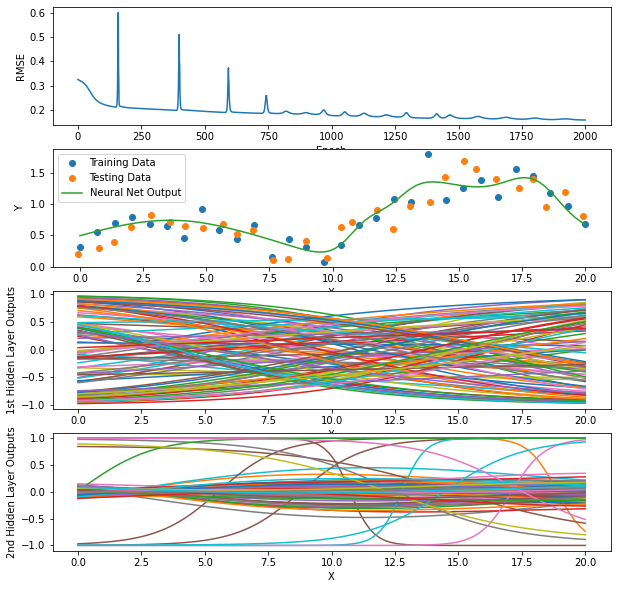

RMSE: Train 0.17 Test 0.21
Plot No  24
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  100  units, Layer 2 :  100  units


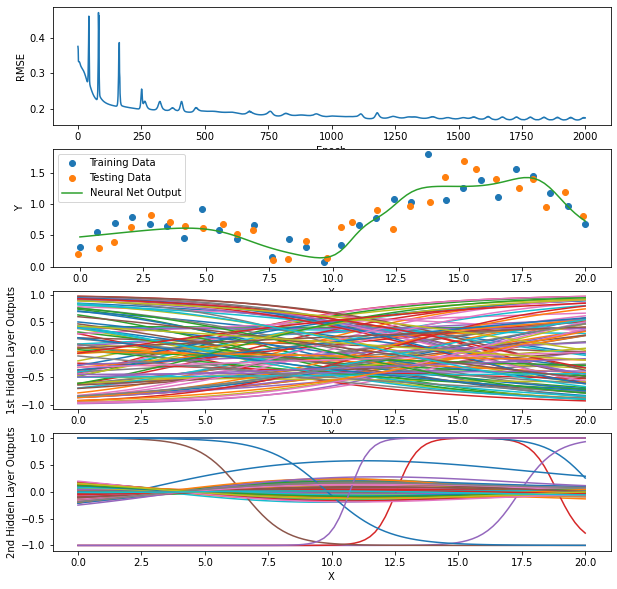

In [136]:
np.random.seed(42)  # Set the random number generator seed so same weight values are generated each time.

n_inputs = Xtrain.shape[1]

n_hiddens1=[2,2]
n_hiddens2=[4,4]
n_hiddens3 = [10,10]
n_hiddens4 = [20,20]
n_hiddens5 = [50,50]
n_hiddens6 = [100,100]
n_hiddens_list=[]
n_hiddens_list.append(n_hiddens1)
n_hiddens_list.append(n_hiddens2)
n_hiddens_list.append(n_hiddens3)
n_hiddens_list.append(n_hiddens4)
n_hiddens_list.append(n_hiddens5)
n_hiddens_list.append(n_hiddens6)

n_outputs = Ttrain.shape[1]
n_epochs = 2000
learning_rate_list = [0.05,0.1,0.2,0.3]
loop_number=0
results_init=[]
for i in range(len(n_hiddens_list)):
    for j in range(len(learning_rate_list)):

        loop_number+=1
        n_hiddens=n_hiddens_list[i]
        learning_rate=learning_rate_list[j]
        Ws = make_weights(n_inputs, n_hiddens, n_outputs)

        Ws, stand_parms, error_trace = train_sgd(Xtrain, Ttrain, Ws, learning_rate, n_epochs)

        Train_Output = use(Xtrain, Ws, stand_parms)
        Ytrain = Train_Output[-1]
        rmse_train = rmse(Ytrain, Ttrain)

        Test_Output = use(Xtest, Ws, stand_parms)
        Ytest = Test_Output[-1]
        rmse_test = rmse(Ytest, Ttest)

        results_init_temp=[]
        results_init_temp.append(n_hiddens)
        results_init_temp.append(learning_rate)
        results_init_temp.append(rmse_train)
        results_init_temp.append(rmse_test)
        results_init.append(results_init_temp)
      
        print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')
        plot(error_trace,Xtrain,Ttrain,Xtest,Ttest,Ws,stand_parms,n_hiddens[0],n_hiddens[1],i,learning_rate,loop_number)


In [137]:
import pandas
df11 = pandas.DataFrame(results_init, columns=('Hidden Layers','Learning Rate', 'RMSE Train', 'RMSE Test'))
df11

Hidden Layers  Learning Rate  RMSE Train  RMSE Test
0         [2, 2]           0.05    0.217859   0.245711
1         [2, 2]           0.10    0.238283   0.251779
2         [2, 2]           0.20    0.199616   0.224990
3         [2, 2]           0.30    0.187024   0.218775
4         [4, 4]           0.05    0.205291   0.234946
5         [4, 4]           0.10    0.194199   0.220794
6         [4, 4]           0.20    0.180741   0.208588
7         [4, 4]           0.30    0.175949   0.213930
8       [10, 10]           0.05    0.205009   0.235213
9       [10, 10]           0.10    0.189684   0.211632
10      [10, 10]           0.20    0.180492   0.200918
11      [10, 10]           0.30    0.174668   0.213690
12      [20, 20]           0.05    0.205088   0.236192
13      [20, 20]           0.10    0.193554   0.218664
14      [20, 20]           0.20    0.169275   0.222378
15      [20, 20]           0.30    0.167017   0.213050
16      [50, 50]           0.05    0.196571   0.220548
17      [50, 50]           0.10    0.183256   0.196143
18      [50, 50]           0.20    0.179503   0.205179
19      [50, 50]           0.30    0.174459   0.208728
20    [100, 100]           0.05    0.190644   0.205989
21    [100, 100]           0.10    0.177977   0.199289
22    [100, 100]           0.20    0.159223   0.211998
23    [100, 100]           0.30    0.173083   0.207103

### PART 1.3 - TEST CODE WITH 1, 2, 3 AND 4 HIDDEN LAYERS USING A FOR LOOP

In [138]:
np.random.seed(42)  # Set the random number generator seed so same weight values are generated each time.

n_inputs = Xtrain.shape[1]
n_outputs = Ttrain.shape[1]

n_epochs = 10000
learning_rate = 0.1
n_hiddens_test = [4,4,4,4]
results_tanh=[]
for i in range(len(n_hiddens_test)):

    n_hiddens=n_hiddens_test[0:i+1]
    print(n_hiddens)
    Ws = make_weights(n_inputs, n_hiddens, n_outputs)

    Ws, stand_parms, error_trace = train_sgd(Xtrain, Ttrain, Ws, learning_rate, n_epochs)

    Train_Output = use(Xtrain, Ws, stand_parms)
    Ytrain = Train_Output[-1]
    rmse_train = rmse(Ytrain, Ttrain)

    Test_Output = use(Xtest, Ws, stand_parms)
    Ytest = Test_Output[-1]
    rmse_test = rmse(Ytest, Ttest)

    results_temp_tanh=[]
    results_temp_tanh.append(len(n_hiddens))
    results_temp_tanh.append(rmse_train)
    results_temp_tanh.append(rmse_test)
    results_tanh.append(results_temp_tanh)


[4]
[4, 4]
[4, 4, 4]
[4, 4, 4, 4]


### PART 1.4 - DISPLAY A TABLE WITH RESULTS OF PART 1.3

In [139]:
import pandas
df = pandas.DataFrame(results_tanh, columns=('Number of Layers', 'RMSE Train', 'RMSE Test'))
df

Number of Layers  RMSE Train  RMSE Test
0                 1    0.177266   0.196150
1                 2    0.177090   0.226952
2                 3    0.176988   0.215491
3                 4    0.175541   0.217162

==============================================================================================================


### PART 1.5 - DISCUSSION

$*****************$
#### OBSERVATIONS FROM PART 1.2
$*****************$

I trained the model(activation function - tanh) with the following variations in parameters:

<b>Number of hidden layers</b> => Kept constant at 2.

<b>Hidden units</b>            => Increased from 2 to 100 in both the layers.

<b>Learning rate</b>           => Increased from 0.05 to 0.3

<b>Epochs</b>                  => 2000

1) When the learning rate was increased with the number of hiddens unit kept constant in both the layers, the 'Training RMSE' decreased and the 'Testing RMSE' increased showing overfitting.

2) When the number of hidden units was high (50 in both layers or 100 in both layers), the 'Testing RMSE' was lower at a learning rate of 0.1 (compared to 0.05) [I observed that it flips when the code is run again]

3) When the number of hidden units was high (50 in both layers or 100 in both layers), the 'Testing RMSE' was the lowest at the learning rate of 0.1. Increasing the learning rate only increased the RMSE value. [I observed that it flips when the code is run again]

4) When the number of hidden units was either 10 in both layers or 20 in both layers, the 'Testing RMSE' was lower at a learning rate of 0.1 (compared to 0.05)

==============================================================================================================

$*****************$
#### OBSERVATIONS FROM PART 1.3
$*****************$


I trained the model(activation function - tanh) with the following variations in parameters:

<b>Number of hidden layers and the hidden units were varied as follows:</b> 
'[4]'
'[4,4]'
'[4,4,4]'
'[4,4,4,4]'

<b>Learning rate</b> => 0.1

<b>Epochs</b> => 10,000

The following observations were made:

1) 'Testing RMSE' was lowest for a single hidden layer with 4 units.

2) Comparing with observations under 1.2, if we observe the following scenario:

     When the number of hidden layers was 2 with 4 units in each layer & Learning Rate was also 0.1 for both experiments:
     
     'Training RMSE' was significantly lower when epochs was 10000 as compared to 2000. This shows significant 
      overfitting.
      
3) Increasing the number of hidden layers without significantly increasing the number of hidden units in each layer does not improve the 'Testing RMSE'. Especially in comparison with observations made form part 1.2. We saw that the lowest RMSE was observed for learning rate of 0.1 and hidden layers set as [10,10]. When the code was run again, the lowest RMSE was observed for learning rate of 0.1 and hidden layers set as [50,50]. But, the general pattern holds true.

4) 'Testing RMSE' was lowest when hidden layers was [4] and kept increasing and was the maximum at [4,4,4,4].
Hence, we can conclude that increasing the number of hidden layers without change in learning rate or number of epochs or the number of hidden units only worsens the performance of the model.

==============================================================================================================

$********************************$
## PART 2 - SIGMOID
$********************************$

### PART 2.1 - CODE IMPLEMENTATION

In [140]:
def plot_asig(error_trace,Xtrain,Ttrain,Xtest,Ttest,Ws,stand_parms,l1_units,l2_units,i,learning_rate,loop_number):
    print('Plot No ',loop_number)
    print('Learning Rate : ',learning_rate,', 2 Hidden layers => Layer 1 : ',l1_units,' units, Layer 2 : ',l2_units,' units' )

    plt.figure(figsize=(10, 10))
    plt.subplot(4, 1, 1)
    plt.plot(error_trace)
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')

    plt.subplot(4, 1, 2)
    plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
    plt.plot(Xtest, Ttest, 'o', label='Testing Data')
    X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
    Output_train = use_asig(X_for_plot, Ws, stand_parms)

    Y_train=Output_train[2]
    plt.plot(X_for_plot, Y_train, label='Neural Net Output')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')

    Z_train=Output_train[0]
    plt.subplot(4, 1, 3)
    plt.plot(X_for_plot, Z_train)
    plt.xlabel('X')
    plt.ylabel('1st Hidden Layer Outputs')

    Z_train=Output_train[1]
    plt.subplot(4, 1, 4)
    plt.plot(X_for_plot, Z_train)
    plt.xlabel('X')
    plt.ylabel('2nd Hidden Layer Outputs')
    plt.show()

In [141]:
def asig(x):
    return 1/(1 + np.exp(-x)) 
def asig_d(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return ds

def forward_asig(Xst, Ws):
    
    Z=[]
    # Calculate the outputs, Z, of all hidden units, given all input samples in X.
   
    input_i=Xst
    for i in range(len(Ws)-1):
        output_i=asig(add_ones(input_i) @ Ws[i])
        Z.append(output_i)
        input_i=output_i
    
    # Calculate the outputs, Y, of all output units, given all outputs of the hidden units.
    Yst = add_ones(Z[-1]) @ Ws[-1]
    
    ZYst=[]
    for i in range(len(Z)):
        ZYst.append(np.array(Z[i]))
    ZYst.append(Yst)
    return ZYst

def backward_asig(Xst, Tst, Ws):
    n_samples = Xst.shape[0]
    n_outputs = Tst.shape[1]
    # Calculate the outputs of both layers.
    ZYst = forward_asig(Xst, Ws)
    Yst=ZYst[-1]
    del ZYst[-1]
    Z=ZYst
    
    # Calculate the delta value for the output layer. Divide by n_samples * n_outputs
    # because we are calculating the gradient of the mean sqauared error with respect to weights.
   

    delta = -(Tst - Yst) /  (n_samples * n_outputs)
    # The gradient of the mean squared error with respect to the output layer weights W.
    gradient_W = add_ones(Z[-1]).T @ delta
    # Back-propagate the delta value from the output layer, through the output layer weights,
    # to the hidden units.  Multiply the result by the derivative of the hidden units'
    # activation function, tanh    
    gradient_Vs=[]
    XZ=[]
    XZ.append(Xst)
    for i in range(len(Z)):
        XZ.append(Z[i])
    
    Ws_temp=Ws[:]
    
    
    for i, j in zip(range(len(Ws)-2,-1,-1),range(len(XZ)-1,0,-1)):
        
        W_curr=Ws_temp[i+1]
        delta=(delta @ W_curr[1:, :].T)* XZ[j]*(1-XZ[j])
        G= add_ones(XZ[j-1]).T @ delta
        gradient_Vs.insert(0,G)
    # Return both gradients.  Each should be the same shape as the respective weight matrices.
    gradient_Vs.append(gradient_W)
    return gradient_Vs


def train_sgd_asig(X, T, Ws, learning_rate, n_epochs):
      # Store standardization parameters in dictionary stand_parms.
   
    stand_parms = calc_standardize_parameters(X, T)
    # Standardize X and T.
    Xst = standardize_X(X, stand_parms)
    Tst = standardize_T(T, stand_parms)

    error_trace = []
   
    # Update weights for n_epochs passes through the training data
    for epoch in range(n_epochs):

        # Calculate the gradients of the mean squared error with respect to each weight matrix.
        gradient_Ws = backward_asig(Xst, Tst, Ws)

        # Update the values in each weight matrix using SGD.
        
        for i in range(len(Ws)):
         Ws[i]-=learning_rate*gradient_Ws[i]
        #V -= learning_rate * gradient_V
        #W -= learning_rate * gradient_W

        # Calculate the outputs of both layers given the current weight values.
        ZYst = forward_asig(Xst, Ws)
        Yst=ZYst[-1]
        
        Y = unstandardize_T(Yst, stand_parms)
        error_trace.append(rmse(Y, T))
    return Ws, stand_parms, error_trace

def use_asig(X, Ws, stand_parms):
    # Standardize inputs X
    Xst = standardize_X(X, stand_parms)
    # Calculate outputs of each layer.
    ZYst = forward_asig(Xst, Ws)
    Yst=ZYst[-1]
    del ZYst[-1]
    Z=ZYst
    
    # Unstandardize output of output layer
    Output=[]
    for i in range(len(Z)):
        Output.append(np.array(Z[i]))
    Output.append(np.array(unstandardize_T(Yst, stand_parms)))
    return Output

#### HIDDEN LAYERS = 2 ; VARY HIDDEN UNITS IN EACH LAYER ; VARY LEARNING RATE

RMSE: Train 0.30 Test 0.29
Plot No  1
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  2  units, Layer 2 :  2  units


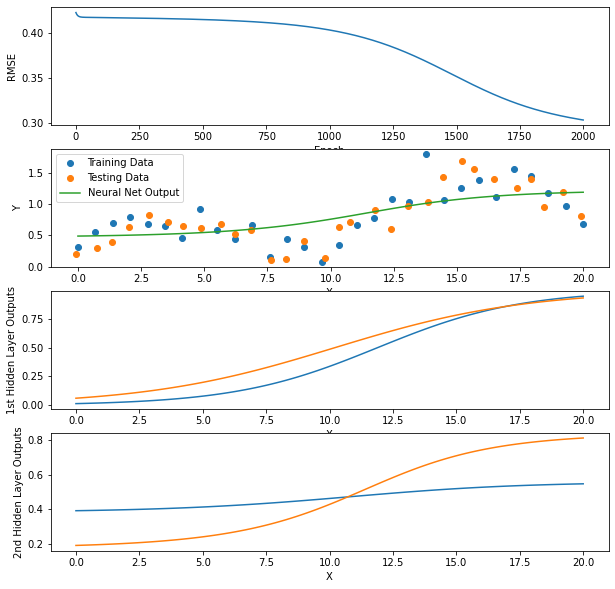

RMSE: Train 0.28 Test 0.26
Plot No  2
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  2  units, Layer 2 :  2  units


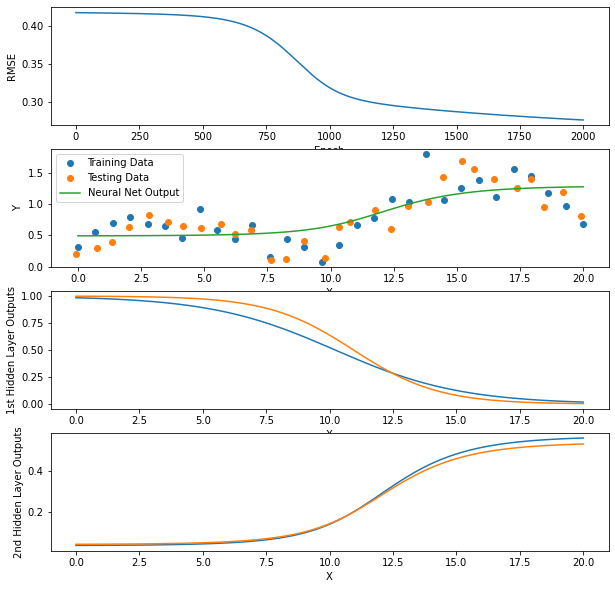

RMSE: Train 0.25 Test 0.24
Plot No  3
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  2  units, Layer 2 :  2  units


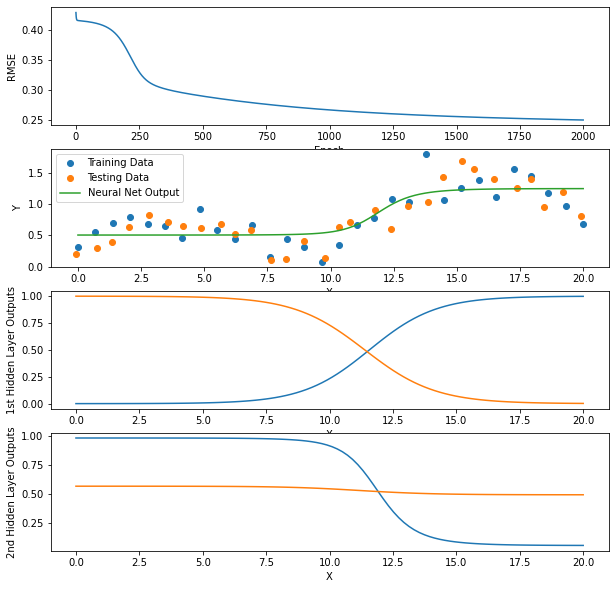

RMSE: Train 0.24 Test 0.24
Plot No  4
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  2  units, Layer 2 :  2  units


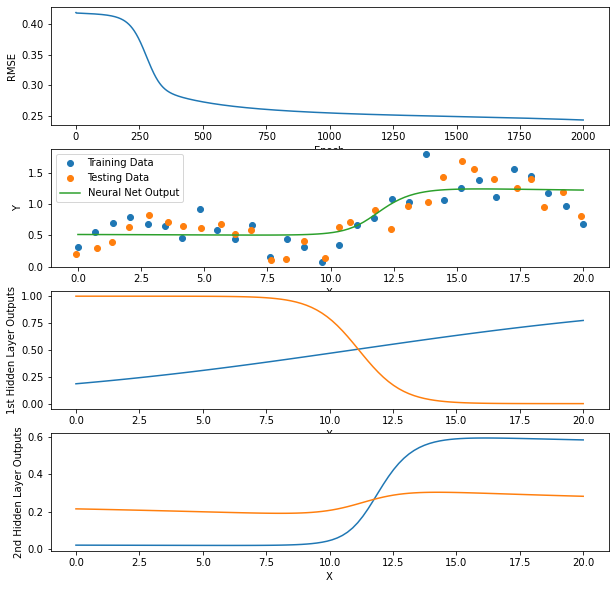

RMSE: Train 0.30 Test 0.28
Plot No  5
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  4  units, Layer 2 :  4  units


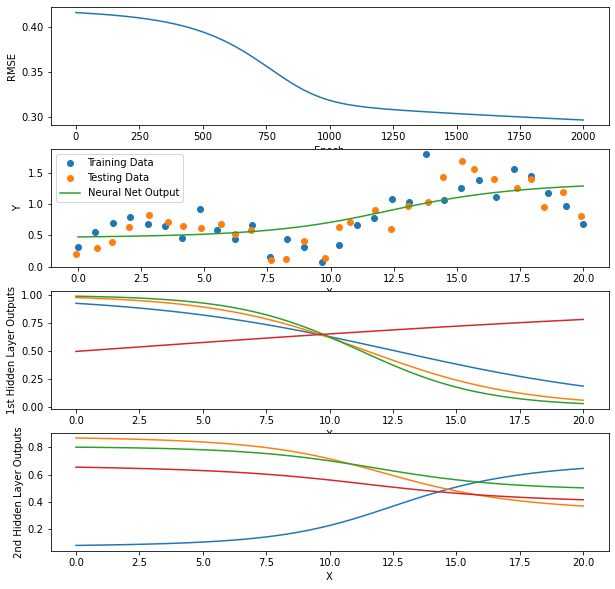

RMSE: Train 0.27 Test 0.25
Plot No  6
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  4  units, Layer 2 :  4  units


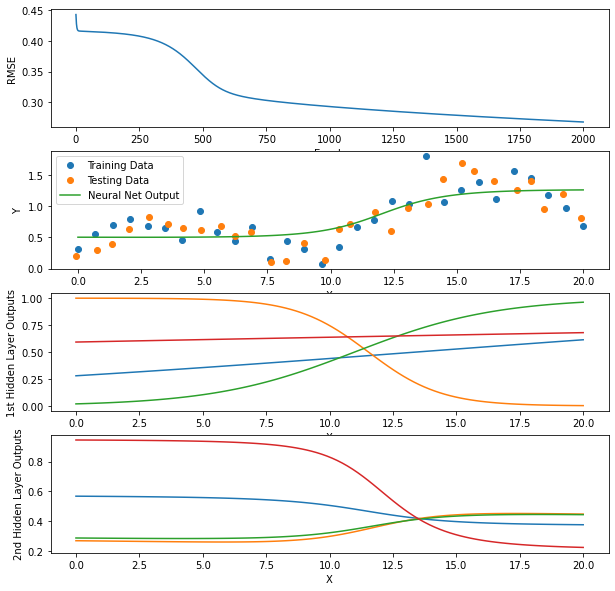

RMSE: Train 0.21 Test 0.23
Plot No  7
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  4  units, Layer 2 :  4  units


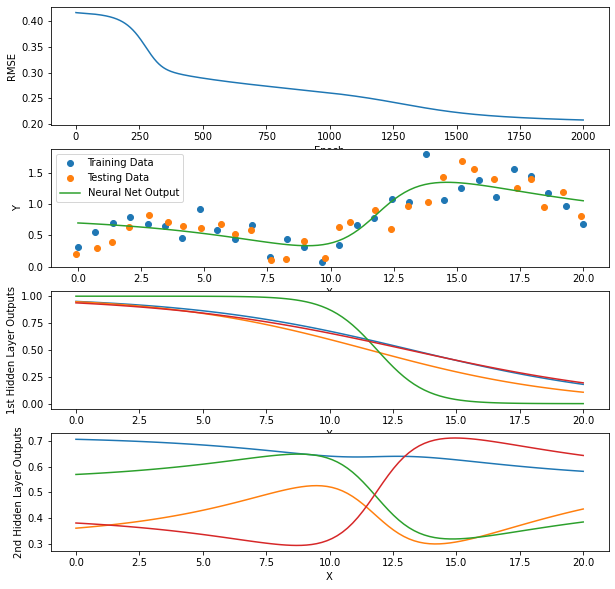

RMSE: Train 0.21 Test 0.23
Plot No  8
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  4  units, Layer 2 :  4  units


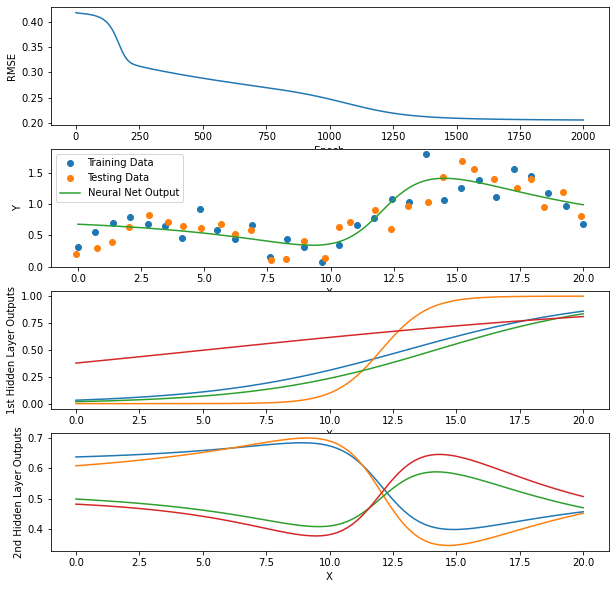

RMSE: Train 0.31 Test 0.29
Plot No  9
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  10  units, Layer 2 :  10  units


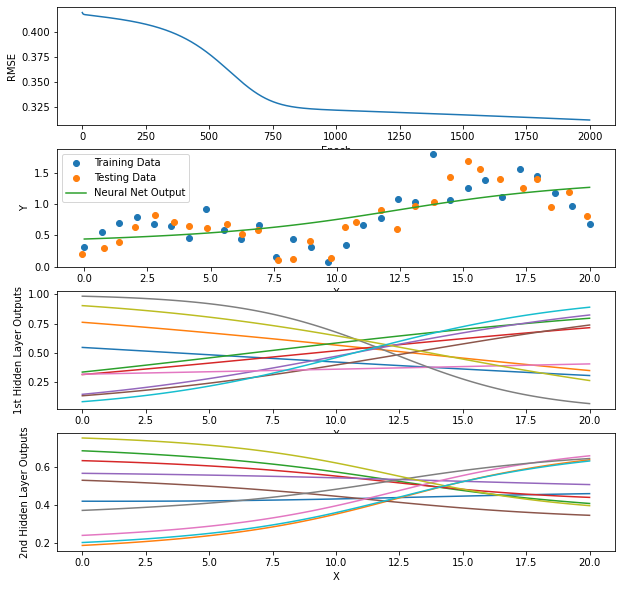

RMSE: Train 0.29 Test 0.27
Plot No  10
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  10  units, Layer 2 :  10  units


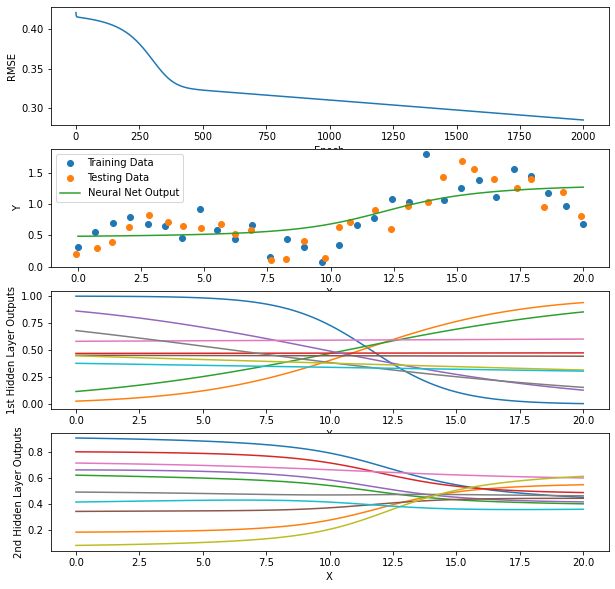

RMSE: Train 0.22 Test 0.24
Plot No  11
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  10  units, Layer 2 :  10  units


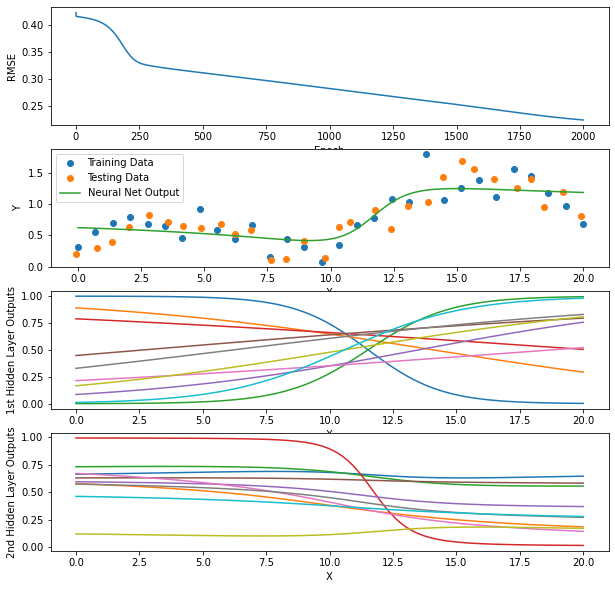

RMSE: Train 0.21 Test 0.24
Plot No  12
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  10  units, Layer 2 :  10  units


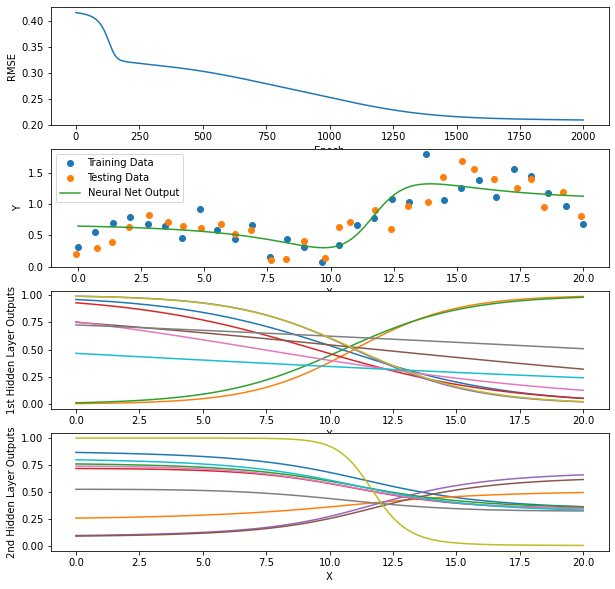

RMSE: Train 0.32 Test 0.30
Plot No  13
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  20  units, Layer 2 :  20  units


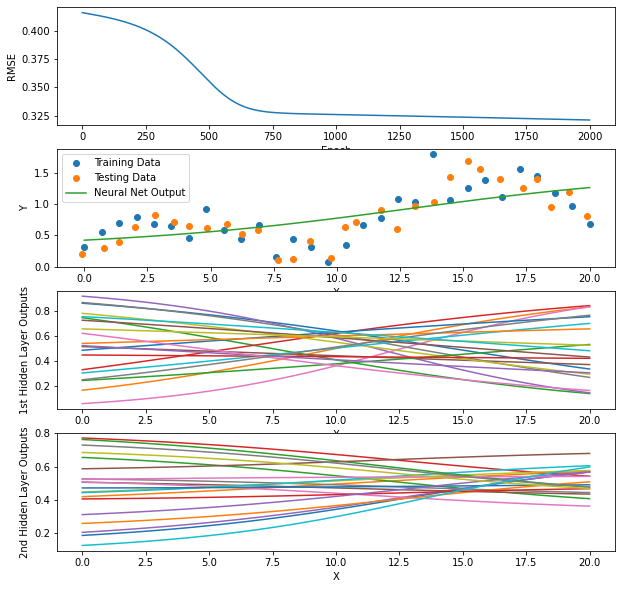

RMSE: Train 0.30 Test 0.28
Plot No  14
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  20  units, Layer 2 :  20  units


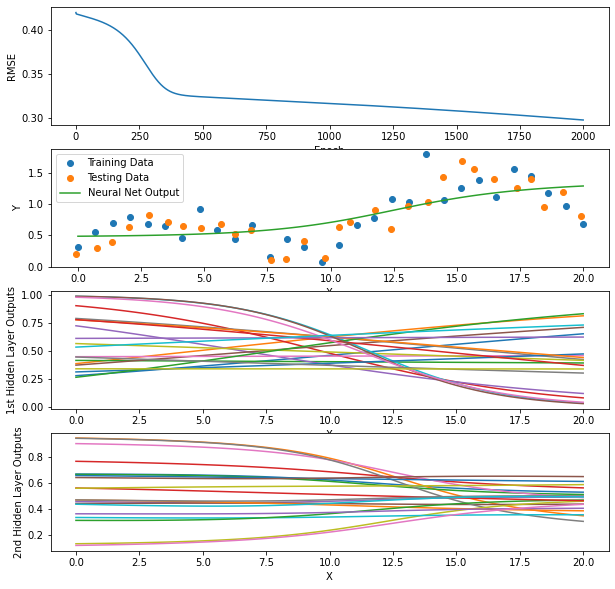

RMSE: Train 0.21 Test 0.23
Plot No  15
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  20  units, Layer 2 :  20  units


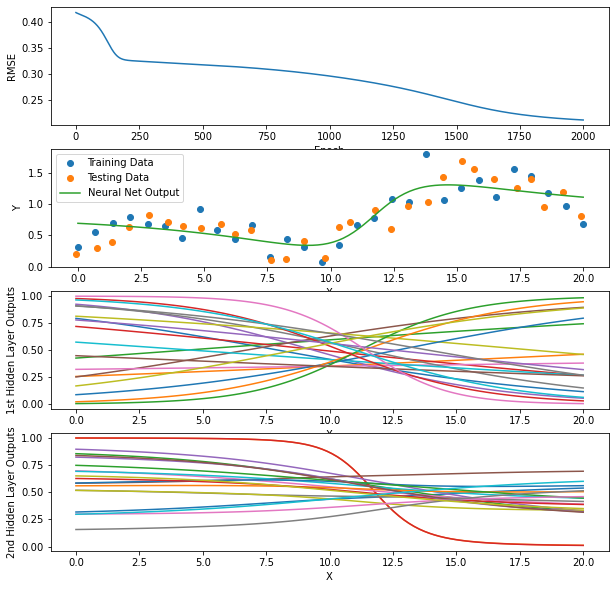

RMSE: Train 0.21 Test 0.24
Plot No  16
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  20  units, Layer 2 :  20  units


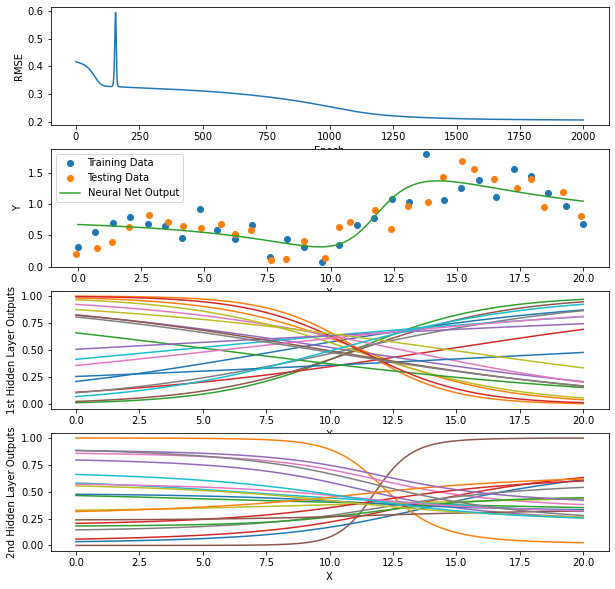

RMSE: Train 0.33 Test 0.31
Plot No  17
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  50  units, Layer 2 :  50  units


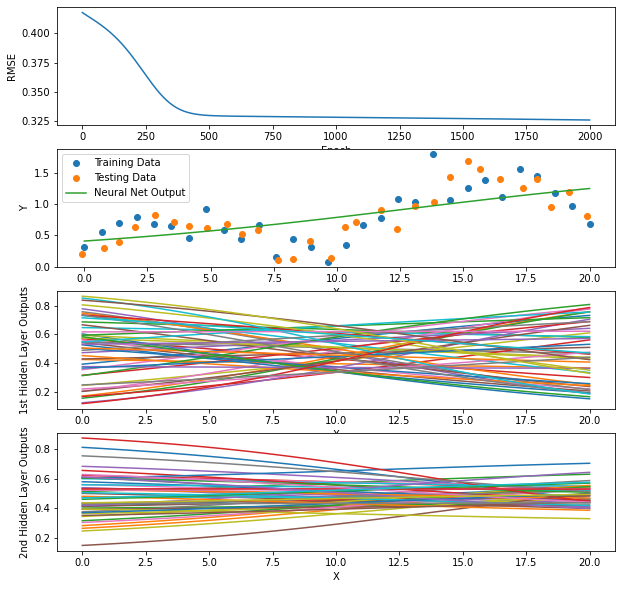

RMSE: Train 0.32 Test 0.30
Plot No  18
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  50  units, Layer 2 :  50  units


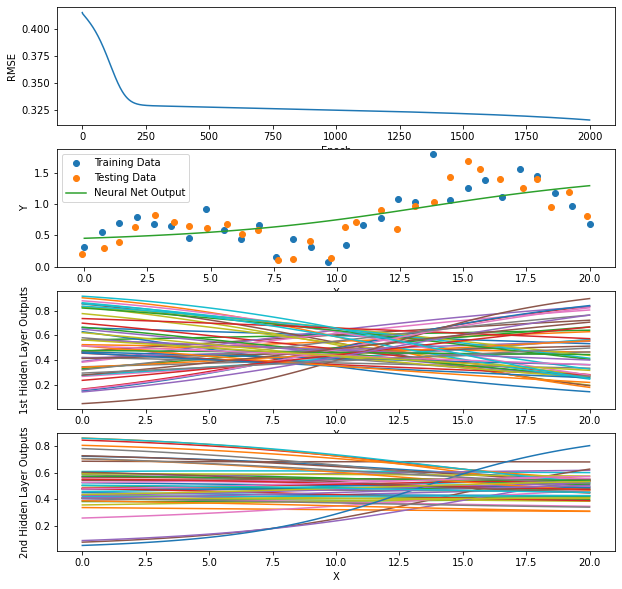

RMSE: Train 0.21 Test 0.23
Plot No  19
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  50  units, Layer 2 :  50  units


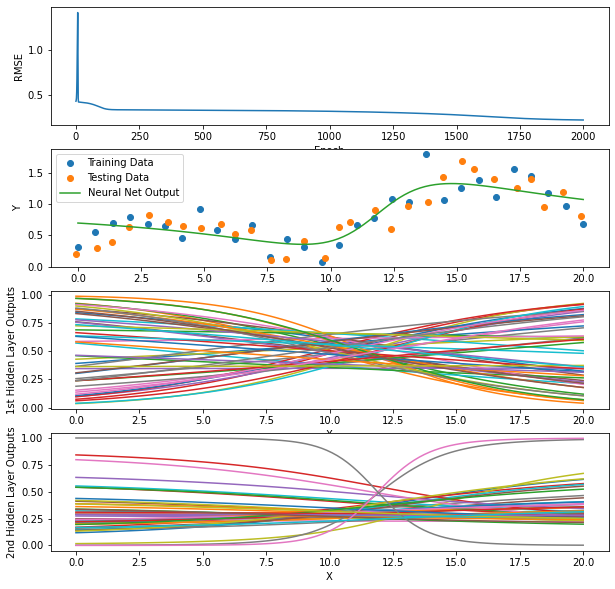

RMSE: Train 0.21 Test 0.23
Plot No  20
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  50  units, Layer 2 :  50  units


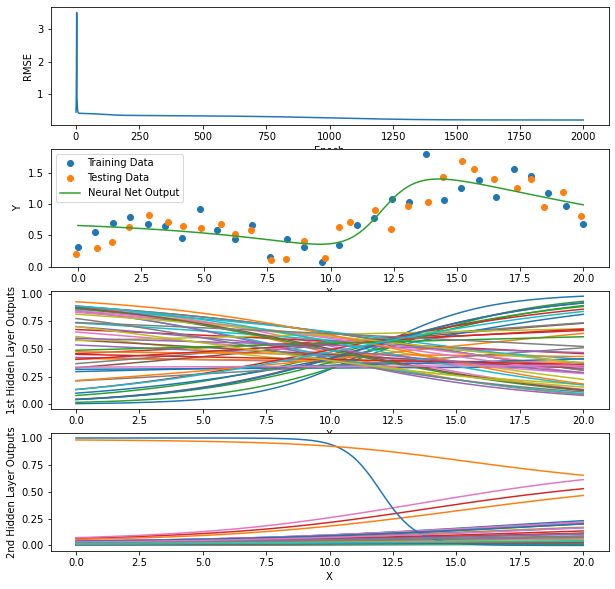

RMSE: Train 0.33 Test 0.31
Plot No  21
Learning Rate :  0.05 , 2 Hidden layers => Layer 1 :  100  units, Layer 2 :  100  units


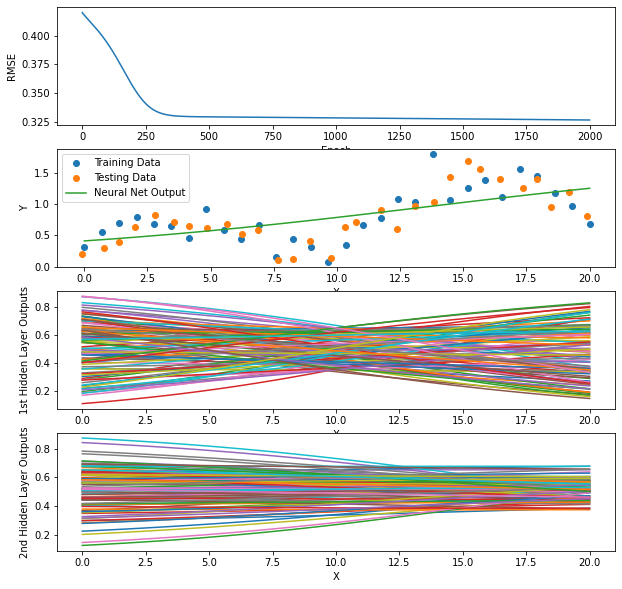

RMSE: Train 0.32 Test 0.30
Plot No  22
Learning Rate :  0.1 , 2 Hidden layers => Layer 1 :  100  units, Layer 2 :  100  units


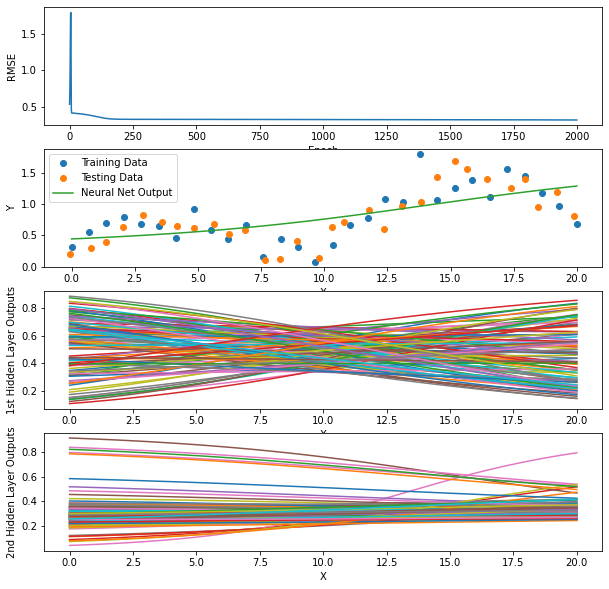

RMSE: Train 0.26 Test 0.25
Plot No  23
Learning Rate :  0.2 , 2 Hidden layers => Layer 1 :  100  units, Layer 2 :  100  units


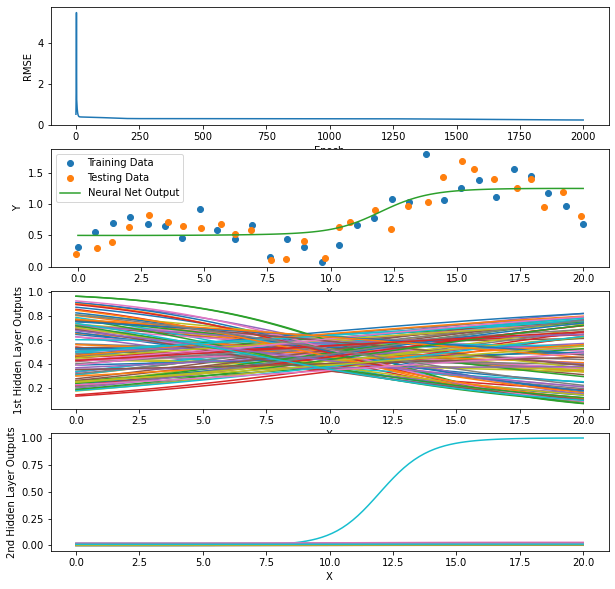

RMSE: Train 0.21 Test 0.24
Plot No  24
Learning Rate :  0.3 , 2 Hidden layers => Layer 1 :  100  units, Layer 2 :  100  units


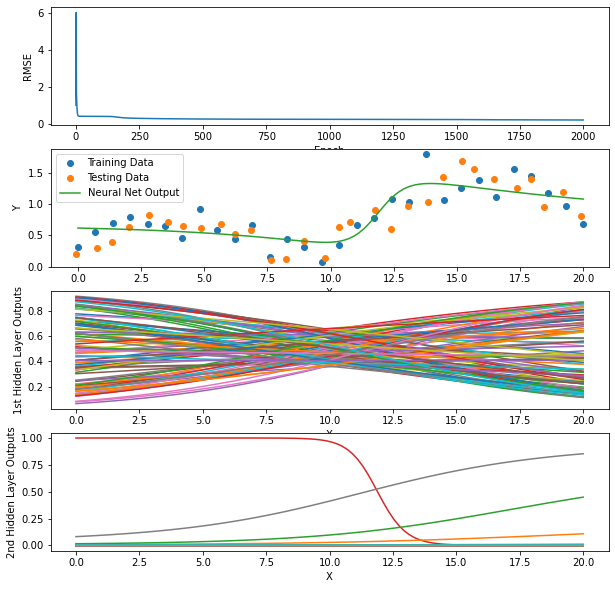

In [144]:
np.random.seed(42)  # Set the random number generator seed so same weight values are generated each time.

n_inputs = Xtrain.shape[1]

n_hiddens1=[2,2]
n_hiddens2=[4,4]
n_hiddens3 = [10,10]
n_hiddens4 = [20,20]
n_hiddens5 = [50,50]
n_hiddens6 = [100,100]
n_hiddens_list=[]
n_hiddens_list.append(n_hiddens1)
n_hiddens_list.append(n_hiddens2)
n_hiddens_list.append(n_hiddens3)
n_hiddens_list.append(n_hiddens4)
n_hiddens_list.append(n_hiddens5)
n_hiddens_list.append(n_hiddens6)

n_outputs = Ttrain.shape[1]
n_epochs = 2000
learning_rate_list = [0.05,0.1,0.2,0.3]
loop_number=0
results_init2=[]
for i in range(len(n_hiddens_list)):
    for j in range(len(learning_rate_list)):

        loop_number+=1
        n_hiddens=n_hiddens_list[i]
        learning_rate=learning_rate_list[j]
        Ws = make_weights(n_inputs, n_hiddens, n_outputs)

        Ws, stand_parms, error_trace = train_sgd_asig(Xtrain, Ttrain, Ws, learning_rate, n_epochs)

        Train_Output = use_asig(Xtrain, Ws, stand_parms)
        Ytrain = Train_Output[-1]
        rmse_train = rmse(Ytrain, Ttrain)

        Test_Output = use_asig(Xtest, Ws, stand_parms)
        Ytest = Test_Output[-1]
        rmse_test = rmse(Ytest, Ttest)

        results_init_temp2=[]
        results_init_temp2.append(n_hiddens)
        results_init_temp2.append(learning_rate)
        results_init_temp2.append(rmse_train)
        results_init_temp2.append(rmse_test)
        results_init2.append(results_init_temp2)
      
        print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')
        plot_asig(error_trace,Xtrain,Ttrain,Xtest,Ttest,Ws,stand_parms,n_hiddens[0],n_hiddens[1],i,learning_rate,loop_number)


In [145]:
import pandas
df23 = pandas.DataFrame(results_init2, columns=('Hidden Layers','Learning Rate', 'RMSE Train', 'RMSE Test'))
df23

Hidden Layers  Learning Rate  RMSE Train  RMSE Test
0         [2, 2]           0.05    0.303342   0.290685
1         [2, 2]           0.10    0.276277   0.258351
2         [2, 2]           0.20    0.249409   0.243170
3         [2, 2]           0.30    0.243938   0.240700
4         [4, 4]           0.05    0.296919   0.278646
5         [4, 4]           0.10    0.267854   0.252135
6         [4, 4]           0.20    0.208222   0.229536
7         [4, 4]           0.30    0.205599   0.227500
8       [10, 10]           0.05    0.312171   0.294592
9       [10, 10]           0.10    0.285171   0.267621
10      [10, 10]           0.20    0.224124   0.236062
11      [10, 10]           0.30    0.209535   0.243385
12      [20, 20]           0.05    0.321246   0.304048
13      [20, 20]           0.10    0.297409   0.279800
14      [20, 20]           0.20    0.212112   0.232138
15      [20, 20]           0.30    0.205578   0.236222
16      [50, 50]           0.05    0.325853   0.309069
17      [50, 50]           0.10    0.315514   0.298285
18      [50, 50]           0.20    0.211953   0.227516
19      [50, 50]           0.30    0.205568   0.232983
20    [100, 100]           0.05    0.326496   0.309850
21    [100, 100]           0.10    0.319950   0.302976
22    [100, 100]           0.20    0.258194   0.245384
23    [100, 100]           0.30    0.212345   0.240394

#### VARY NUMBER OF HIDDEN LAYERS FROM 1 TO 4 WITH 4 HIDDEN UNITS EACH

In [146]:
np.random.seed(42)  # Set the random number generator seed so same weight values are generated each time.

n_inputs = Xtrain.shape[1]
n_outputs = Ttrain.shape[1]
np.random.seed(42)  # Set the random number generator seed so same weight values are generated each time.

n_epochs = 10000
learning_rate = 0.1
n_hiddens_test = [4,4,4,4]

results_asig=[]
for i in range(len(n_hiddens_test)):

    n_hiddens=n_hiddens_test[0:i+1]
    Ws = make_weights(n_inputs, n_hiddens, n_outputs)

    Ws, stand_parms, error_trace = train_sgd_asig(Xtrain, Ttrain, Ws, learning_rate, n_epochs)

    Train_Output = use_asig(Xtrain, Ws, stand_parms)
    Ytrain = Train_Output[-1]
    rmse_train = rmse(Ytrain, Ttrain)

    Test_Output = use_asig(Xtest, Ws, stand_parms)
    Ytest = Test_Output[-1]
    rmse_test = rmse(Ytest, Ttest)

    results_temp_asig=[]
    results_temp_asig.append(len(n_hiddens))
    results_temp_asig.append(rmse_train)
    results_temp_asig.append(rmse_test)
    results_asig.append(results_temp_asig)

### PART 2.2 - DISCUSSION AND COMPARISON WITH TANH RESULTS

#### ASIG RESULTS

In [147]:
import pandas
df111 = pandas.DataFrame(results_asig, columns=('Number of Layers', 'RMSE Train', 'RMSE Test'))
df111

Number of Layers  RMSE Train  RMSE Test
0                 1    0.202423   0.226247
1                 2    0.206030   0.238881
2                 3    0.202243   0.227399
3                 4    0.416895   0.431932

#### DISPLAYING TANH RESULTS AGAIN FOR EASE OF COMPARISON

In [148]:
df

Number of Layers  RMSE Train  RMSE Test
0                 1    0.177266   0.196150
1                 2    0.177090   0.226952
2                 3    0.176988   0.215491
3                 4    0.175541   0.217162

#### OBSERVATIONS:

1) The RMSE values for sigmoid are relatively higher than tanh showing that sigmoid takes longer to converge.

2) Asig performs better a higher learning rate of 0.2 or 0.3. This is in comparison with 0.1 or 0.05 for tanh.

3) For Asig, when learning rate was 0.3, 'Testing RMSE' decreased when number of hidden units in each layer (2 layers totally), was increased from 2 -> 4-> 50. 

  For Tanh, when learning rate was 0.1, 'Testing RMSE' decreased when number of hidden units in each layer (2 layers totally), was increased from 2 -> 4-> 10.
  
  Thus, we can conclude that Tanh converges with fewer hidden units in a layer.

4) When we consider the following parameter settings (comparing tanh to asig):

      Common Settings: Epochs = 10,000, Learning Rate = 0.1, 4 hidden layers with 4 units in each layer
      
      'Testing RMSE' for asig was double the value THAN when it had 2 hidden layers with 4 units in each layer.
      
      Whereas, the 'Testing RMSE' values showed much less variation for tanh.
      
       Thus, asig performance worsens when the number of hidden layers is increased without an increase in the number of units in each layer

==============================================================================================================

$********************************$
## EXTRA CREDIT 
$********************************$

### Brief Description

I chose the [Facebook Comment Volume Dataset](http://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset)
from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php)

<b>Abstract(picked up from the website):</b> Instances in this dataset contain features extracted from facebook posts. The task associated with the data is to predict how many comments the post will receive.

The training data has 40949 rows. The test data has 100 rows.
The training and test data contains 54 columns each. I have displayed a select few from the training data as seen below.

### Training

Training Input - I have picked the column which gives the <b>number of comments received in the LAST 24 hours</b> .

Target Output -The column which gives the <b>number of comments received in the NEXT 24 hours</b> (relative to a base time).

I created two models. One is trained using tanh as activation function and the other using sigmoid as activation function. Testing is perfomed using both the models.

### Testing

I use the model on the test data to predict how many comments a page will receive in the next 24 hours.

### Prepare the data


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
data_train_ec = pandas.read_csv('Features_Variant_1.csv', delimiter=',', decimal='.', usecols=[0,2,30,34,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53], na_values=-200,names=["Page Poularity","Page Talking About","No of comments last 24h","Base Time","Post Promotion Status","H hrs","Post Published Day-Sun","Post Published Day-Mon","Post Published Day-Tue","Post Published Day-Wed","Post Published Day-Thu","Post Published Day-Fri","Post Published Day-Sat","Base Day-Sun","Base Day-Mon","Base Day-Tue","Base Day-Wed","Base Day-Thu","Base Day-Fri","Base Day-Sat","No of comments next H hrs"])
data_test_ec = pandas.read_csv('Test_Case_1.csv', delimiter=',', decimal='.', usecols=[0,2,30,34,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53], na_values=-200,names=["Page Poularity","Page Talking About","No of comments last 24h","Base Time","Post Promotion Status","H hrs","Post Published Day-Sun","Post Published Day-Mon","Post Published Day-Tue","Post Published Day-Wed","Post Published Day-Thu","Post Published Day-Fri","Post Published Day-Sat","Base Day-Sun","Base Day-Mon","Base Day-Tue","Base Day-Wed","Base Day-Thu","Base Day-Fri","Base Day-Sat","No of comments next H hrs"])

In [126]:
np.shape(data_train_ec)

(40949, 21)

In [127]:
data_train_ec.head(100)

Page Poularity  Page Talking About  No of comments last 24h  Base Time  \
0           634995                 463                        0         65   
1           634995                 463                        0         10   
2           634995                 463                        0         14   
3           634995                 463                        0         62   
4           634995                 463                        0         58   
..             ...                 ...                      ...        ...   
95          634995                 463                        0         50   
96          634995                 463                        0         67   
97          634995                 463                        0         37   
98          634995                 463                        3         32   
99          634995                 463                       12         29   

    Post Promotion Status  H hrs  Post Published Day-Sun  \
0                       0     24                       0   
1                       0     24                       0   
2                       0     24                       0   
3                       0     24                       0   
4                       0     24                       0   
..                    ...    ...                     ...   
95                      0     24                       0   
96                      0     24                       0   
97                      0     24                       0   
98                      0     24                       0   
99                      0     24                       0   

    Post Published Day-Mon  Post Published Day-Tue  Post Published Day-Wed  \
0                        0                       0                       1   
1                        0                       0                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        1                       0                       0   
..                     ...                     ...                     ...   
95                       0                       0                       0   
96                       0                       0                       0   
97                       0                       0                       0   
98                       1                       0                       0   
99                       1                       0                       0   

    ...  Post Published Day-Fri  Post Published Day-Sat  Base Day-Sun  \
0   ...                       0                       0             0   
1   ...                       0                       0             0   
2   ...                       1                       0             0   
3   ...                       1                       0             0   
4   ...                       0                       0             0   
..  ...                     ...                     ...           ...   
95  ...                       0                       0             0   
96  ...                       0                       0             1   
97  ...                       1                       0             1   
98  ...                       0                       0             0   
99  ...                       0                       0             0   

    Base Day-Mon  Base Day-Tue  Base Day-Wed  Base Day-Thu  Base Day-Fri  \
0              0             0             0             0             0   
1              0             0             0             0             1   
2              0             0             0             0             0   
3              1             0             0             0             0   
4              0             0             1             0             0   
..           ...           ...           ...           ...           ...   


In [128]:
Xtrain_ec=[data_train_ec["No of comments last 24h"]]
Xtrain_ec=(np.array(Xtrain_ec)).T

Ttrain_ec=[data_train_ec["No of comments next H hrs"]]
Ttrain_ec=(np.array(Ttrain_ec)).T

Xtest_ec=[data_test_ec["No of comments last 24h"]]
Xtest_ec=(np.array(Xtest_ec)).T

Ttest_ec=[data_test_ec["No of comments next H hrs"]]
Ttest_ec=(np.array(Ttest_ec)).T

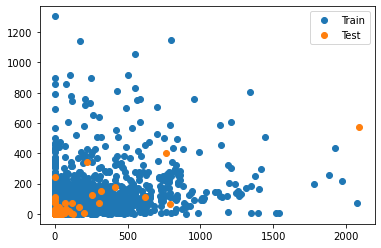

In [129]:
plt.plot(Xtrain_ec, Ttrain_ec, 'o', label='Train')
plt.plot(Xtest_ec, Ttest_ec, 'o', label='Test')
plt.legend();

### Plot Function


In [130]:
def fb_comment_volume_plot(error_trace_ec,stand_parms_ec,Ws_ec,Xtrain_ec,Ttrain_ec,Xtest_ec,Ttest_ec,tanh_or_sigmoid_ec):

    plt.figure(figsize=(10, 10))
    plt.subplot(6, 1, 1)
    plt.plot(error_trace_ec)
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')

    plt.subplot(6, 1, 2)
    plt.plot(Xtrain_ec, Ttrain_ec, 'o', label='Training Data')
    plt.plot(Xtest_ec, Ttest_ec, 'o', label='Testing Data')
    X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
    if tanh_or_sigmoid_ec == 1:
        Output_train_ec = use(X_for_plot, Ws_ec, stand_parms_ec)
    else:
        Output_train_ec = use_asig(X_for_plot, Ws_ec, stand_parms_ec)
        
    

    plt.plot(X_for_plot, Output_train_ec[4], label='Neural Net Output')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.subplot(6, 1, 3)
    plt.plot(X_for_plot, Output_train_ec[0])
    plt.xlabel('X')
    plt.ylabel('1st HL Outputs')

    plt.subplot(6, 1, 4)
    plt.plot(X_for_plot, Output_train_ec[1])
    plt.xlabel('X')
    plt.ylabel('2nd HL Outputs')
    
    plt.subplot(6, 1, 5)
    plt.plot(X_for_plot, Output_train_ec[2])
    plt.xlabel('X')
    plt.ylabel('3rd HL Outputs')
    
    
    plt.subplot(6, 1, 6)
    plt.plot(X_for_plot, Output_train_ec[3])
    plt.xlabel('X')
    plt.ylabel('4th HL Outputs')

### Train the network (with tanh as activation function) and apply the model on the test data


In [131]:
np.random.seed(42)  # Set the random number generator seed so same weight values are generated each time.
n_inputs_ec = Xtrain_ec.shape[1]
n_hiddens_ec = [4,4,4,4]
n_outputs_ec = Ttrain_ec.shape[1]

n_epochs_ec = 10000
learning_rate_ec = 0.1

Ws_ec = make_weights(n_inputs_ec, n_hiddens_ec, n_outputs_ec)

Ws_ec, stand_parms_ec, error_trace_ec = train_sgd(Xtrain_ec, Ttrain_ec, Ws_ec, learning_rate_ec, n_epochs_ec)

Train_Output_ec = use(Xtrain_ec, Ws_ec, stand_parms_ec)
Ytrain_ec = Train_Output_ec[-1]
rmse_train_ec = rmse(Ytrain_ec, Ttrain_ec)

Test_Output_ec = use(Xtest_ec, Ws_ec, stand_parms_ec)
Ytest_ec = Test_Output_ec[-1]
rmse_test_ec = rmse(Ytest_ec, Ttest_ec)

print(f'RMSE: Train {rmse_train_ec:.2f} Test {rmse_test_ec:.2f}')

RMSE: Train 29.80 Test 62.27


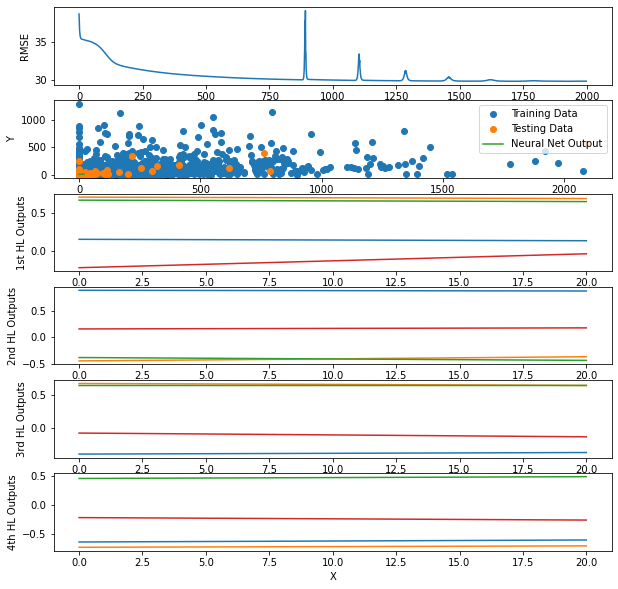

In [132]:
fb_comment_volume_plot(error_trace_ec,stand_parms_ec,Ws_ec,Xtrain_ec,Ttrain_ec,Xtest_ec,Ttest_ec,1)

### Train the network (with sigmoid as activation function) and apply the model on the test data


In [21]:
np.random.seed(42)  # Set the random number generator seed so same weight values are generated each time.
n_inputs_ec = Xtrain_ec.shape[1]
n_hiddens_ec = [4,4,4,4]
n_outputs_ec = Ttrain_ec.shape[1]

n_epochs_ec = 10000
learning_rate_ec = 0.1

Ws_ec = make_weights(n_inputs_ec, n_hiddens_ec, n_outputs_ec)

Ws_ec, stand_parms_ec, error_trace_ec = train_sgd_asig(Xtrain_ec, Ttrain_ec, Ws_ec, learning_rate_ec, n_epochs_ec)

Train_Output_ec = use_asig(Xtrain_ec, Ws_ec, stand_parms_ec)
Ytrain_ec = Train_Output_ec[-1]
rmse_train_ec = rmse(Ytrain_ec, Ttrain_ec)

Test_Output_ec = use_asig(Xtest_ec, Ws_ec, stand_parms_ec)
Ytest_ec = Test_Output_ec[-1]
rmse_test_ec = rmse(Ytest_ec, Ttest_ec)

print(f'RMSE: Train {rmse_train_ec:.2f} Test {rmse_test_ec:.2f}')

RMSE: Train 35.47 Test 87.43


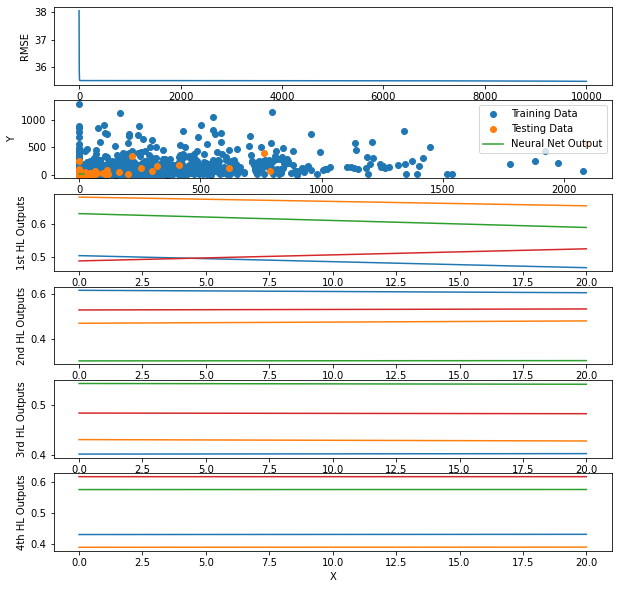

In [22]:
fb_comment_volume_plot(error_trace_ec,stand_parms_ec,Ws_ec,Xtrain_ec,Ttrain_ec,Xtest_ec,Ttest_ec,2)

### Observations:

1. RMSE for test data with model trained using <b>tanh</b> as activation function is <b>61.69</b>
2. RMSE for test data with model trained using <b>sigmoid</b> as activation function is <b>87.43</b>

Thus, we can conclude that the prediction is not good.
I would mainly attribute it to NOT training the data using all the relevant parameters. I trained the model using only one parameter - "Comments received on the post in the last 24 hours". For better prediction results, we should also consider:

1) The day on which the post was published (a post published on weekends might receive more comments)

2) The time at which the post was published ( posts published in the evening may receive more comments since people are back from work)

3) Has the post been promoted?

4) Is it a post related to a hot topic in the news?

5) Who shared the post?

6) The country and the specific region where a post was shared. If the post pertains to a local event, the   number of comments would vary as opposed to an event of international significance. It can also vary depending on the population density of the region.

7) Is the post visibility public or is it only visible to the Facebook group in which it was posted? Or, if shared to a timeline, can people not in the friends list of the person who shared the post view it?

       Some of these attributes of Facebook posts (points 1-7) that I mentioned above are available in the dataset. Some are not.


# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A2grader.tar) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 40 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A2.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [149]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Gopinath-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

## Testing ####################################################################

    X = np.arange(4).reshape(-1, 1) + 5
    T = np.array([1, 2, -3, -4]).reshape((-1, 1))
    Ws = make_weights(1, [3, 4], 1)
    for W in Ws:
        W[:] = np.linspace(-1, 1, W.size).reshape(W.shape)

    stand_parms = {'Xmeans': np.array([[0]]), 'Xstds': np.array([[1]]),
                   'Tmeans': np.array([[0]]), 'Tstds': np.array([[1]])}

    def print_layers(what, lst):
        print(f'{what}:')
        for (i, element) in enumerate(lst):
            print(f' Layer {i}:')
            print(f' {element}')

    print('X is')
    print(X)
    print_layers('Ws', Ws)
    print('stand_parms is')
    print(stand_parms)
    Ys = use(X, Ws, stand_parms)

X is
 [[5]
 [6]